In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import statsmodels
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

## This Notebook describes main steps in product building including data processing, EDA, Test Statistics and Regression Modeling
### All steps of data processing applied to transformed dataset (converted to hourly data points)
### Training is done using train_data.csv (80% split)
### Validation is done using test_data.csv (20% split) March, 2019 original sales records

## Data Processing (Hourly Dataset)

In [2]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
train_org = train.copy()
test_org = test.copy()

In [4]:
train.columns, test.columns

(Index(['Date', 'Sales'], dtype='object'),
 Index(['Date', 'Sales'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(Date      object
 Sales    float64
 dtype: object,
 Date      object
 Sales    float64
 dtype: object)

In [6]:
test.shape, train.shape

((667, 2), (2668, 2))

In [7]:
train.head()

Date   Sales
0  2018-08-31 21:00:00   49.30
1  2018-08-31 22:00:00  163.20
2  2018-08-31 23:00:00  219.41
3  2018-09-01 00:00:00  580.91
4  2018-09-01 01:00:00  482.20

In [8]:
train['Date'] = pd.to_datetime(train.Date, format = '%Y-%m-%d %H:%M')
test['Date'] = pd.to_datetime(test.Date, format = '%Y-%m-%d %H:%M')
test_org['Date'] = pd.to_datetime(test_org.Date,format= '%Y-%m-%d %H:%M')
train_org['Date'] = pd.to_datetime(train_org.Date,format='%Y-%m-%d %H:%M')

In [9]:
train.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object

In [10]:
train.head(5)

Date   Sales
0 2018-08-31 21:00:00   49.30
1 2018-08-31 22:00:00  163.20
2 2018-08-31 23:00:00  219.41
3 2018-09-01 00:00:00  580.91
4 2018-09-01 01:00:00  482.20

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2668 non-null   datetime64[ns]
 1   Sales   2668 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.8 KB


In [12]:
train.tail()

Date   Sales
2663 2019-07-02 00:00:00   62.80
2664 2019-07-02 01:00:00  216.17
2665 2019-07-02 02:00:00  156.06
2666 2019-07-02 03:00:00   51.10
2667 2019-07-02 20:00:00   42.28

In [13]:
for i in (test, train, test_org, train_org):
    i['Year'] = i.Date.dt.year
    i['Month'] = i.Date.dt.month
    i['Day'] = i.Date.dt.day
    i['Hour'] = i.Date.dt.hour
    #i["day of the week"] = i.Date.dt.dayofweek

In [14]:
test.head(5)

Date   Sales  Year  Month  Day  Hour
0 2019-07-02 21:00:00  153.00  2019      7    2    21
1 2019-07-02 22:00:00  224.58  2019      7    2    22
2 2019-07-02 23:00:00  205.25  2019      7    2    23
3 2019-07-03 00:00:00  148.12  2019      7    3     0
4 2019-07-03 01:00:00  194.05  2019      7    3     1

In [15]:
train['Day Of The Week'] = train.Date.dt.dayofweek

In [16]:
train.head(5)

Date   Sales  Year  Month  Day  Hour  Day Of The Week
0 2018-08-31 21:00:00   49.30  2018      8   31    21                4
1 2018-08-31 22:00:00  163.20  2018      8   31    22                4
2 2018-08-31 23:00:00  219.41  2018      8   31    23                4
3 2018-09-01 00:00:00  580.91  2018      9    1     0                5
4 2018-09-01 01:00:00  482.20  2018      9    1     1                5

## Data Exploratory Analysis

In [17]:
temp = train['Date']

In [18]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train.Date.apply(applyer)
train['Weekend'] = temp2

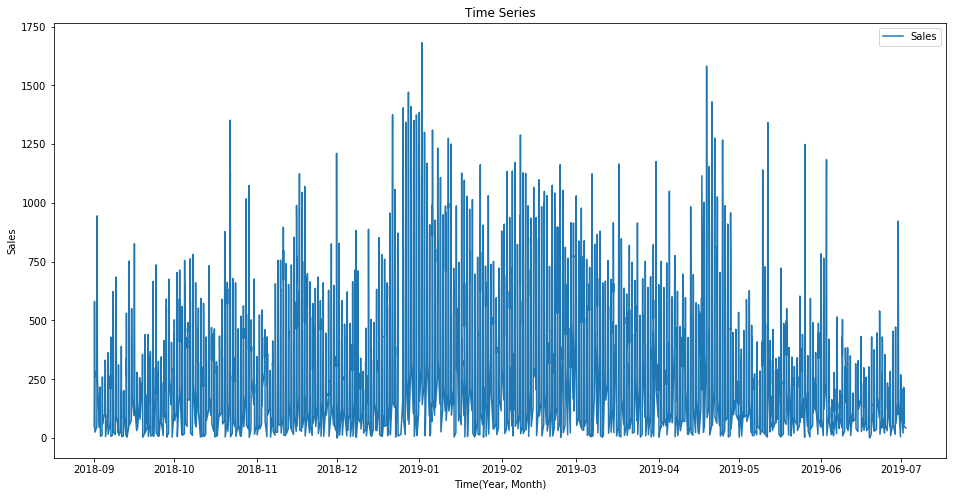

In [19]:
train.index = train['Date']
df=train
ts = df['Sales']
plt.figure(figsize = (16,8))
plt.plot(ts, label = 'Sales')
plt.title('Time Series')
plt.xlabel('Time(Year, Month)')
plt.ylabel("Sales")
plt.legend(loc = 'best')

In [20]:
##Exploratory Data Analysis

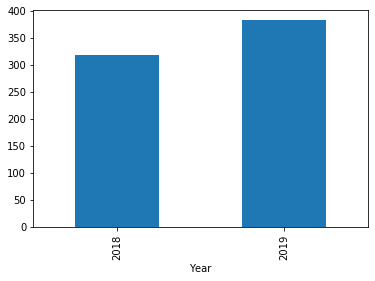

In [21]:
train.groupby('Year')['Sales'].mean().plot.bar()

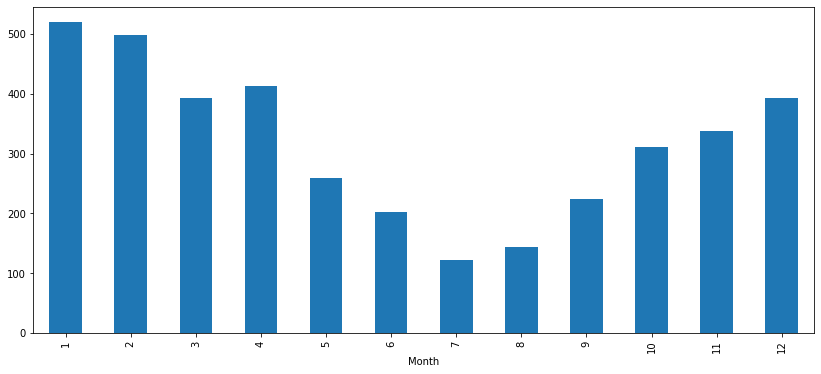

In [22]:
train.groupby('Month')['Sales'].mean().plot.bar(figsize = (14,6))

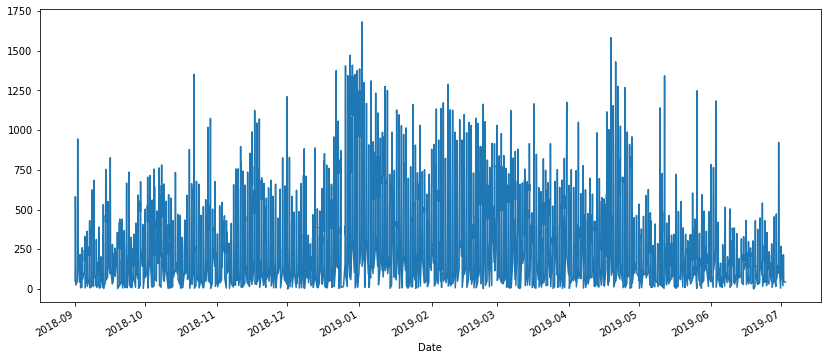

In [23]:
plt.figure(figsize = (14,6))
train['Sales'].plot()

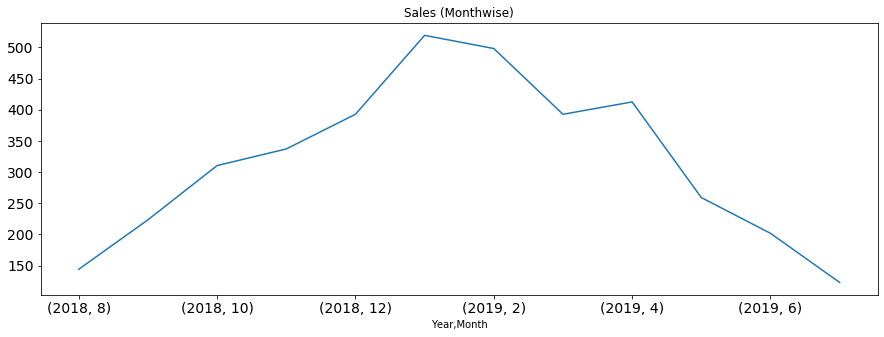

In [24]:
temp = train.groupby(['Year','Month'])['Sales'].mean()
temp.plot(figsize = (15,5), title = 'Sales (Monthwise)', fontsize = 14)

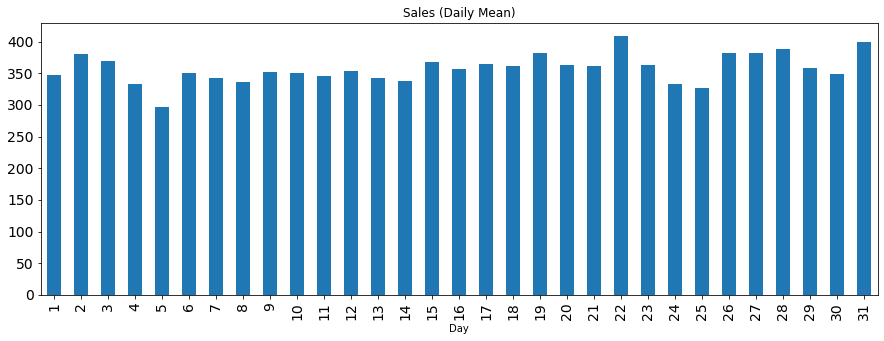

In [25]:
train.groupby('Day')['Sales'].mean().plot.bar(figsize = (15,5), title = 'Sales (Daily Mean)', fontsize = 14)

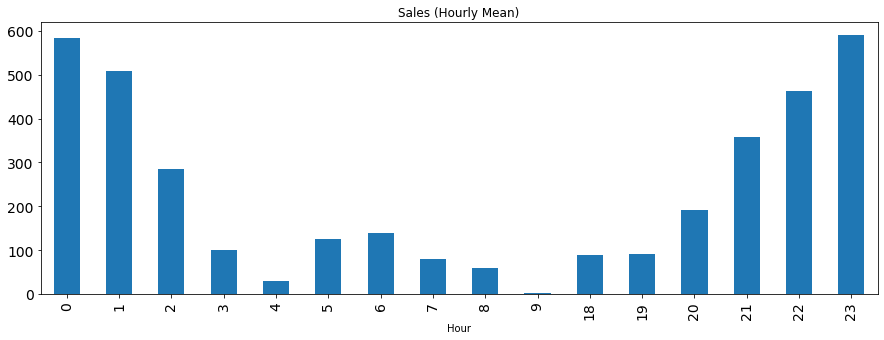

In [26]:
train.groupby('Hour')['Sales'].mean().plot.bar(figsize = (15,5), title = 'Sales (Hourly Mean)', fontsize = 14)

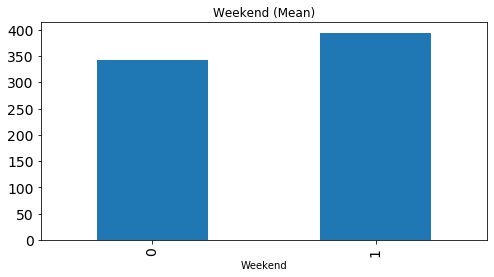

In [27]:
train.groupby('Weekend')['Sales'].mean().plot.bar(figsize = (8,4), title = 'Weekend (Mean)', fontsize = 14)

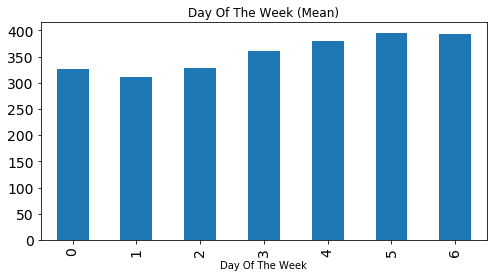

In [28]:
train.groupby('Day Of The Week')['Sales'].mean().plot.bar(figsize = (8,4), title = 'Day Of The Week (Mean)', fontsize = 14)

In [29]:
train.head(3)

Date   Sales  Year  Month  Day  Hour  \
Date                                                                      
2018-08-31 21:00:00 2018-08-31 21:00:00   49.30  2018      8   31    21   
2018-08-31 22:00:00 2018-08-31 22:00:00  163.20  2018      8   31    22   
2018-08-31 23:00:00 2018-08-31 23:00:00  219.41  2018      8   31    23   

                     Day Of The Week  Weekend  
Date                                           
2018-08-31 21:00:00                4        0  
2018-08-31 22:00:00                4        0  
2018-08-31 23:00:00                4        0

In [30]:
train.timestamp = pd.to_datetime(train.Date, format = '%Y-%m-%d %H:%M')
train.index = train.timestamp

#hourly time series
hourly = train.resample('H').mean()

#converting to daily mean
daily = train.resample('D').mean()

#converting to weekly mean
weekly = train.resample('W').mean()

#converting to monthly mean
monthly = train.resample('M').mean()

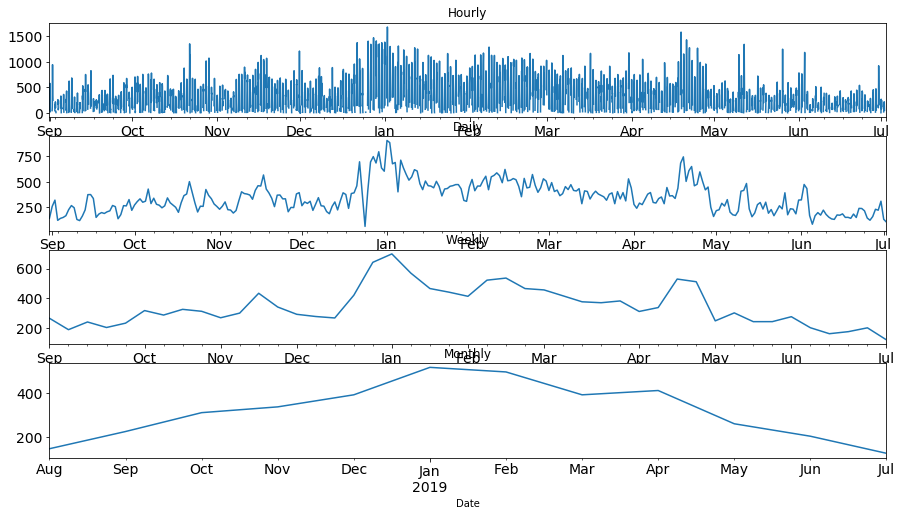

In [31]:
fig, axs = plt.subplots(4,1)
hourly.Sales.plot(figsize = (15,8), title = 'Hourly', fontsize = 14, ax = axs[0])
daily.Sales.plot(figsize = (15,8), title = 'Daily', fontsize = 14, ax = axs[1])
weekly.Sales.plot(figsize = (15,8), title = 'Weekly', fontsize = 14, ax = axs[2])
monthly.Sales.plot(figsize = (15,8), title = 'Monthly', fontsize = 14, ax = axs[3])
plt.show()

In [32]:
test.Timestamp = pd.to_datetime(test.Date,format='%Y-%m-%d %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Date,format='%Y-%m-%d %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306 entries, 2018-08-31 to 2019-07-02
Freq: D
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sales            306 non-null    float64
 1   Year             306 non-null    float64
 2   Month            306 non-null    float64
 3   Day              306 non-null    float64
 4   Hour             306 non-null    float64
 5   Day Of The Week  306 non-null    float64
 6   Weekend          306 non-null    float64
dtypes: float64(7)
memory usage: 19.1 KB


In [34]:
train.head(244)

Sales    Year  Month   Day       Hour  Day Of The Week  \
Date                                                                      
2018-08-31  143.970000  2018.0    8.0  31.0  22.000000              4.0   
2018-09-01  260.067778  2018.0    9.0   1.0  10.666667              5.0   
2018-09-02  321.642500  2018.0    9.0   2.0  11.500000              6.0   
2018-09-03  123.112222  2018.0    9.0   3.0   9.111111              0.0   
2018-09-04  142.574286  2018.0    9.0   4.0  10.285714              1.0   
...                ...     ...    ...   ...        ...              ...   
2019-04-27  422.373333  2019.0    4.0  27.0  10.666667              5.0   
2019-04-28  450.250000  2019.0    4.0  28.0   9.500000              6.0   
2019-04-29  251.123750  2019.0    4.0  29.0  11.500000              0.0   
2019-04-30  160.983333  2019.0    4.0  30.0  11.500000              1.0   
2019-05-01  218.456667  2019.0    5.0   1.0  10.777778              2.0   

            Weekend  
Date                 
2018-08-31      0.0  
2018-09-01      1.0  
2018-09-02      1.0  
2018-09-03      0.0  
2018-09-04      0.0  
...             ...  
2019-04-27      1.0  
2019-04-28      1.0  
2019-04-29      0.0  
2019-04-30      0.0  
2019-05-01      0.0  

[244 rows x 7 columns]

In [35]:
train.tail(62)

Sales    Year  Month   Day       Hour  Day Of The Week  \
Date                                                                      
2019-05-02  227.030000  2019.0    5.0   2.0  10.666667              3.0   
2019-05-03  290.870000  2019.0    5.0   3.0  10.285714              4.0   
2019-05-04  263.743750  2019.0    5.0   4.0  11.500000              5.0   
2019-05-05  326.662500  2019.0    5.0   5.0  11.500000              6.0   
2019-05-06  203.932222  2019.0    5.0   6.0  10.666667              0.0   
...                ...     ...    ...   ...        ...              ...   
2019-06-28  231.960000  2019.0    6.0  28.0  11.500000              4.0   
2019-06-29  222.766250  2019.0    6.0  29.0  11.500000              5.0   
2019-06-30  311.156250  2019.0    6.0  30.0  11.500000              6.0   
2019-07-01  133.571250  2019.0    7.0   1.0  11.500000              0.0   
2019-07-02  105.682000  2019.0    7.0   2.0   5.200000              1.0   

            Weekend  
Date                 
2019-05-02      0.0  
2019-05-03      0.0  
2019-05-04      1.0  
2019-05-05      1.0  
2019-05-06      0.0  
...             ...  
2019-06-28      0.0  
2019-06-29      1.0  
2019-06-30      1.0  
2019-07-01      0.0  
2019-07-02      0.0  

[62 rows x 7 columns]

In [36]:
train.head(244).to_csv(r'../SciPY/train2_data.csv')

In [37]:
train.tail(62).to_csv(r'../SciPY/validation_data.csv')

In [38]:
train = train.head(244)

In [39]:
train.head(4)

Sales    Year  Month   Day       Hour  Day Of The Week  \
Date                                                                      
2018-08-31  143.970000  2018.0    8.0  31.0  22.000000              4.0   
2018-09-01  260.067778  2018.0    9.0   1.0  10.666667              5.0   
2018-09-02  321.642500  2018.0    9.0   2.0  11.500000              6.0   
2018-09-03  123.112222  2018.0    9.0   3.0   9.111111              0.0   

            Weekend  
Date                 
2018-08-31      0.0  
2018-09-01      1.0  
2018-09-02      1.0  
2018-09-03      0.0

In [40]:
Valid=train.tail(62)

In [41]:
Valid.head(5)

Sales    Year  Month  Day       Hour  Day Of The Week  \
Date                                                                     
2019-03-01  416.357778  2019.0    3.0  1.0  12.444444              4.0   
2019-03-02  494.003333  2019.0    3.0  2.0  12.333333              5.0   
2019-03-03  406.356667  2019.0    3.0  3.0  12.333333              6.0   
2019-03-04  420.135556  2019.0    3.0  4.0  12.333333              0.0   
2019-03-05  365.090000  2019.0    3.0  5.0  11.500000              1.0   

            Weekend  
Date                 
2019-03-01      0.0  
2019-03-02      1.0  
2019-03-03      1.0  
2019-03-04      0.0  
2019-03-05      0.0

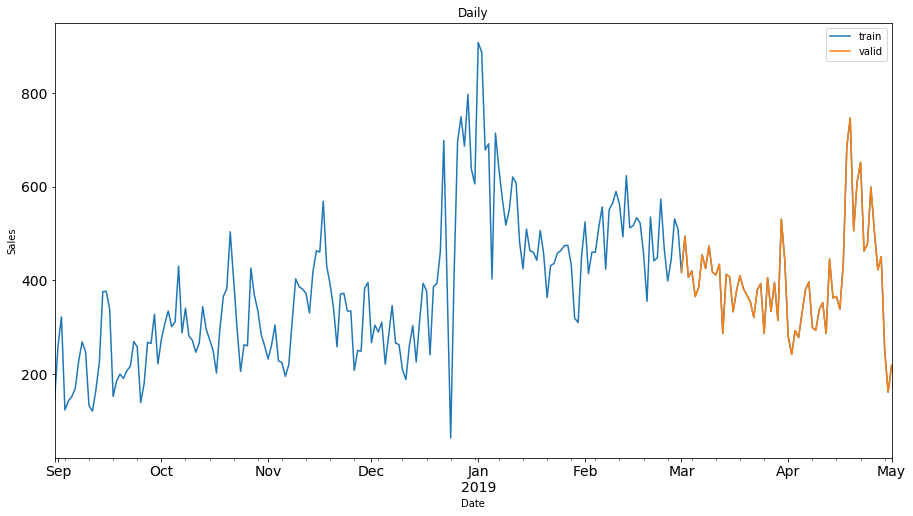

In [42]:
train.Sales.plot(figsize=(15,8), title= 'Daily', fontsize=14, label='train')
Valid.Sales.plot(figsize=(15,8), title= 'Daily', fontsize=14, label='valid')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.show()

# Regression Modeling Processes

## Naive Approach, Holts Linear, Holts Winter, SES

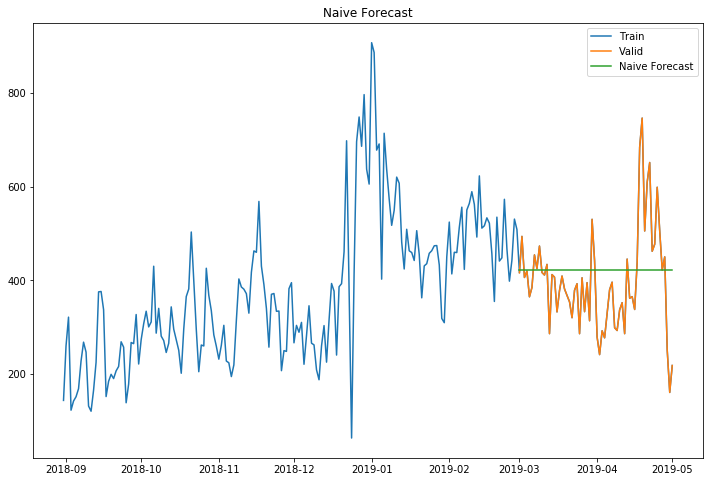

In [45]:
dd = np.asarray(train.Sales)
y_hat = Valid.copy()
y_hat['Naive'] = dd[len(dd)-5]
plt.figure(figsize = (12,8))
plt.plot(train.index, train['Sales'], label = 'Train')
plt.plot(Valid.index,Valid['Sales'], label='Valid')
plt.plot(y_hat.index,y_hat['Naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [46]:
#checking the accruacy with RMSE for Naive Approach
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Valid.Sales, y_hat.Naive))
print(rms)

109.75058227024493


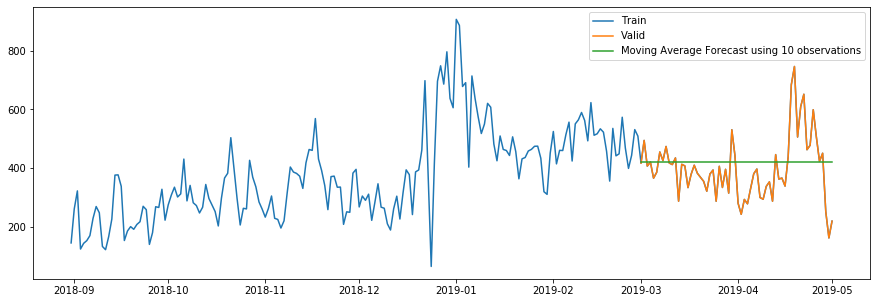

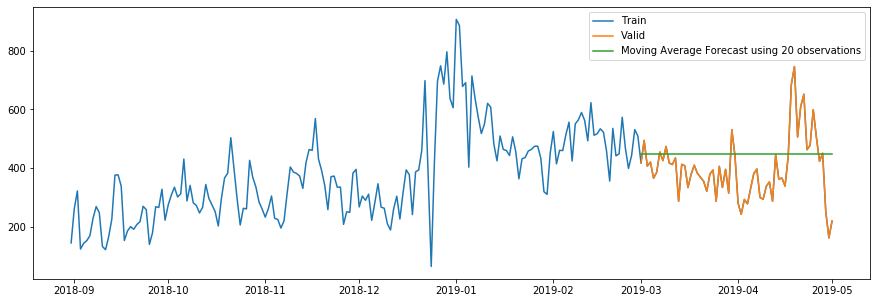

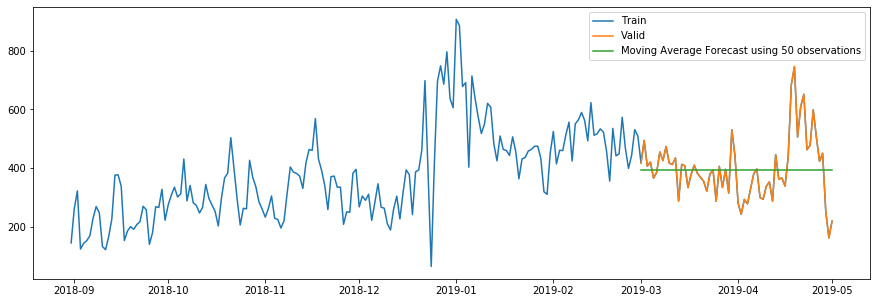

In [47]:
# Moving Average
# Moving average of last 10 observations
y_hat_avg = Valid.copy()
y_hat_avg['moving_avg_forecast'] = train['Sales'].rolling(10).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

#Moving average of last 20 observations
y_hat_avg = Valid.copy()
y_hat_avg['moving_avg_forecast'] = train['Sales'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

#Moving average of last 50 observations
y_hat_avg = Valid.copy()
y_hat_avg['moving_avg_forecast'] = train['Sales'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

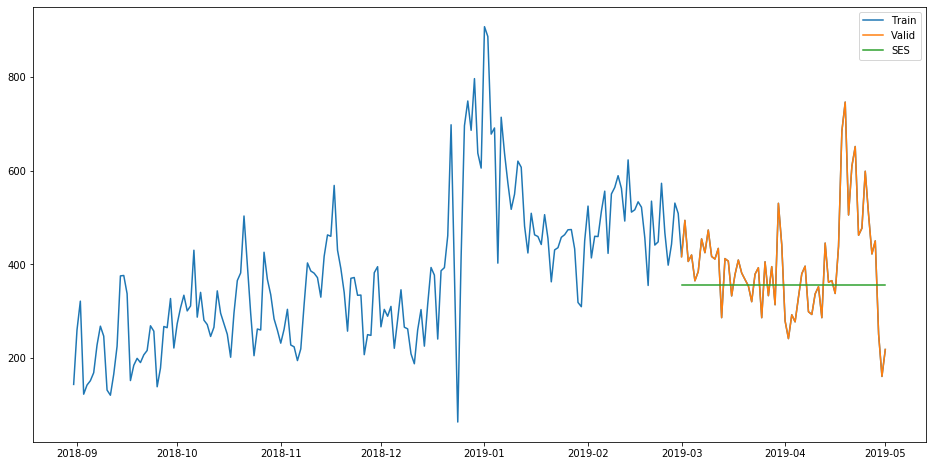

In [48]:
#Simple Exponential Smoothing 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = Valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Sales'])).fit(smoothing_level = 0.2, optimized = True)
y_hat_avg['SES'] = fit2.forecast(len(Valid))
plt.figure(figsize = (16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [49]:
rms = sqrt(mean_squared_error(Valid.Sales, y_hat_avg.SES))
print(rms)

115.24973565402192


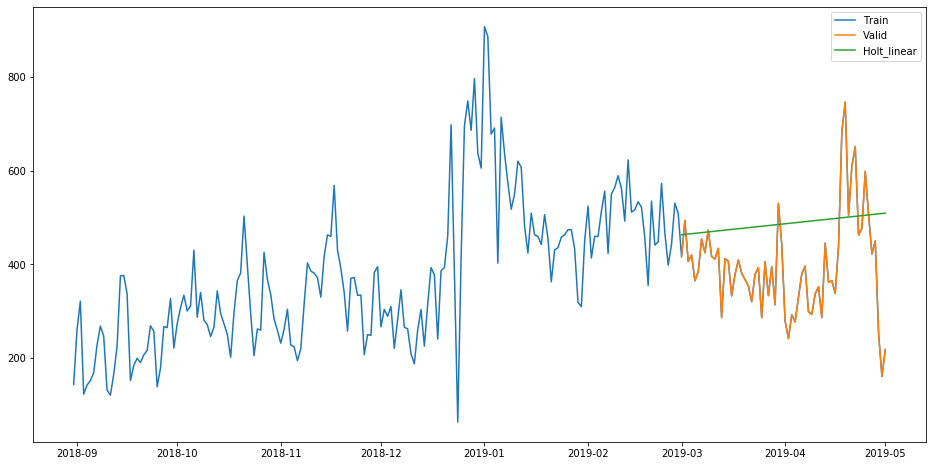

In [50]:
# Holts Linear Trend Model
y_hat_avg = Valid.copy()

fit1 = Holt(np.asarray(train['Sales'])).fit(smoothing_level = 0.1, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(Valid))

plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [51]:
rms = sqrt(mean_squared_error(Valid.Sales, y_hat_avg.Holt_linear))
print(rms)

138.3381188335098


In [162]:
submission = pd.read_csv('test_data.csv')
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [163]:
train_org['ratio'] = train_org['Sales']/train_org['Sales'].sum()

In [164]:
temp = train_org.groupby(['Hour'])['ratio'].sum()

In [165]:
pd.DataFrame(temp, columns =['ratio']).to_csv('GROUPBY.csv')

In [166]:
temp2 = pd.read_csv('GROUPBY.csv')

In [167]:
merge = pd.merge(test,test_org, on= ('Day','Month','Year'),how = 'left')

In [168]:
merge['Hour'] = merge['Hour_y']

In [169]:
merge.head()

Sales_x    Year  Month  Day  Hour_x  prediction                Date  \
0  194.276667  2019.0    7.0  2.0    22.0   63.638489 2019-07-02 21:00:00   
1  194.276667  2019.0    7.0  2.0    22.0   63.638489 2019-07-02 22:00:00   
2  194.276667  2019.0    7.0  2.0    22.0   63.638489 2019-07-02 23:00:00   
3  181.987500  2019.0    7.0  3.0    11.5   84.101501 2019-07-03 00:00:00   
4  181.987500  2019.0    7.0  3.0    11.5   84.101501 2019-07-03 01:00:00   

   Sales_y  Hour_y  Hour  
0   153.00      21    21  
1   224.58      22    22  
2   205.25      23    23  
3   148.12       0     0  
4   194.05       1     1

## Exponential Smoothing

In [170]:
import pandas as pd
from pandas import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.api import tsa

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.plotting import autocorrelation_plot

In [171]:
prediction = pd.merge(merge,temp2, on = 'Hour', how = 'left')

In [172]:
prediction['Sales'] = prediction['prediction']*prediction['ratio']*24

In [173]:
submission = prediction
pd.DataFrame(submission, columns=['Sales']).to_csv('Exponential_Smoothing_Holts_Linear.csv')

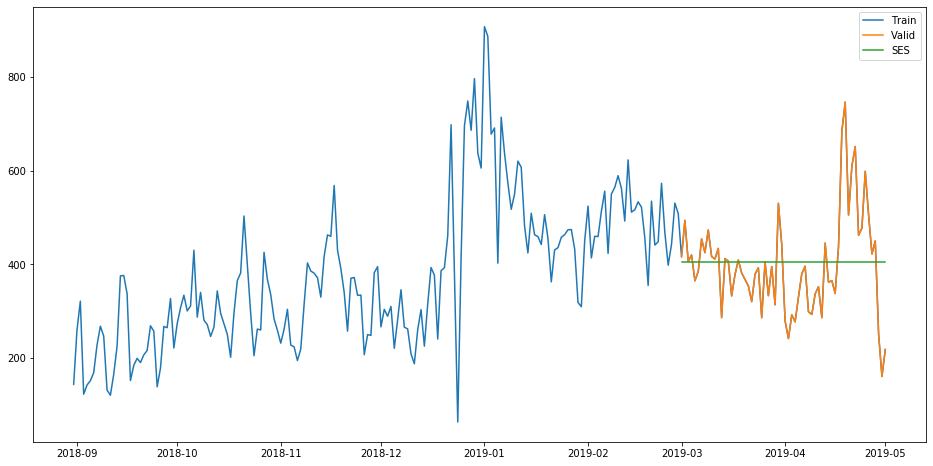

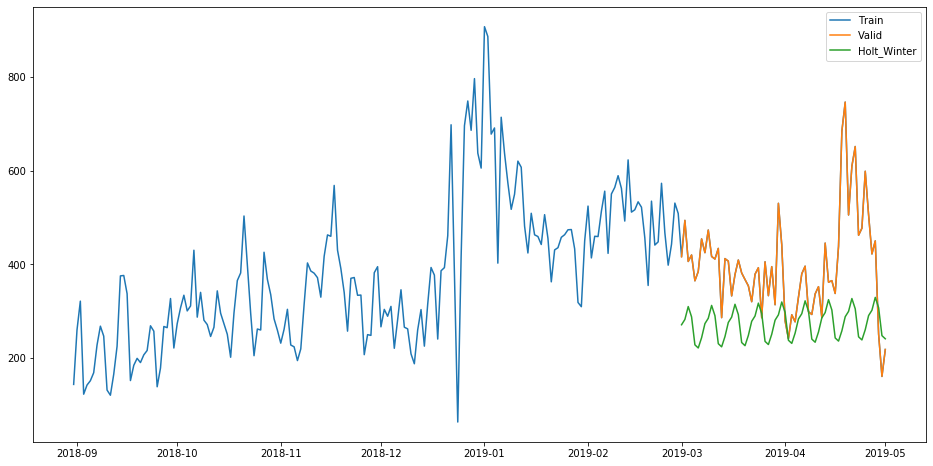

In [64]:
# Holts Winter model
y_hat_avg = Valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Sales'])).fit(smoothing_level = 0.1, optimized = True)
y_hat_avg['SES'] = fit2.forecast(len(Valid))
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

y_hat_avg = Valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods = 7, trend = 'add', seasonal = 'add',).fit()
y_hat_avg['Holts_Winter'] = fit1.forecast(len(Valid))
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['Holts_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [65]:
rms = sqrt(mean_squared_error(Valid.Sales, y_hat_avg.Holts_Winter))
print(rms)

162.39565460188277


In [66]:
rms = sqrt(mean_squared_error(Valid.Sales, y_hat_avg.Holts_Winter))
print(rms)

162.39565460188277


In [144]:
predict=fit1.forecast(len(test))
test['prediction']=predict

In [145]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_org, on=('Day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Date','Hour_x','Hour_y'], axis=1)

In [146]:
# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

In [147]:
# Converting the ratio to the original scale
prediction['Sales']=prediction['prediction']*prediction['ratio']*24

In [148]:
submission=prediction.drop(['Day','Hour','ratio','prediction'],axis=1)

In [149]:
# Converting the final submission to csv format
pd.DataFrame(submission, columns=['Sales']).to_csv('Holt winters.csv')

## Test_Stationary Function - Dickey-Fuller Tests - ADF  Test statistics (log, diff)

In [69]:
#function to do dickey fuller test to determine if the data is stationary timeseries

from statsmodels.tsa.stattools import adfuller

In [70]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [71]:
test_result=adfuller(train_org['Sales'])

In [72]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(Sales):
    result=adfuller(Sales)
    labels=['ADF Test Statistics', 'p-value', '#Lags Used', 'Number of observations used']
    for value, label in zip(result,labels):
        print(label+ ' : '+str(value))
    if result[1]<=0.05:
        print("Strong Evidence Against The NULL Hypothesis(H0), reject the null hypothesis. Data has no unit root, it's stationary")
    else:
        print("Weak Evidence Against NULL Hypothesis, time series has a unit root, indicating it's non stationary")

In [73]:
adfuller_test(train_org['Sales'])

ADF Test Statistics : -4.119050508930744
p-value : 0.0009006344201812142
#Lags Used : 28
Number of observations used : 2639
Strong Evidence Against The NULL Hypothesis(H0), reject the null hypothesis. Data has no unit root, it's stationary


In [74]:
train_log = np.log(train['Sales'])
valid_log = np.log(train['Sales'])

In [75]:
train_log.head()

Date
2018-08-31    4.969605
2018-09-01    5.560942
2018-09-02    5.773441
2018-09-03    4.813096
2018-09-04    4.959863
Freq: D, Name: Sales, dtype: float64

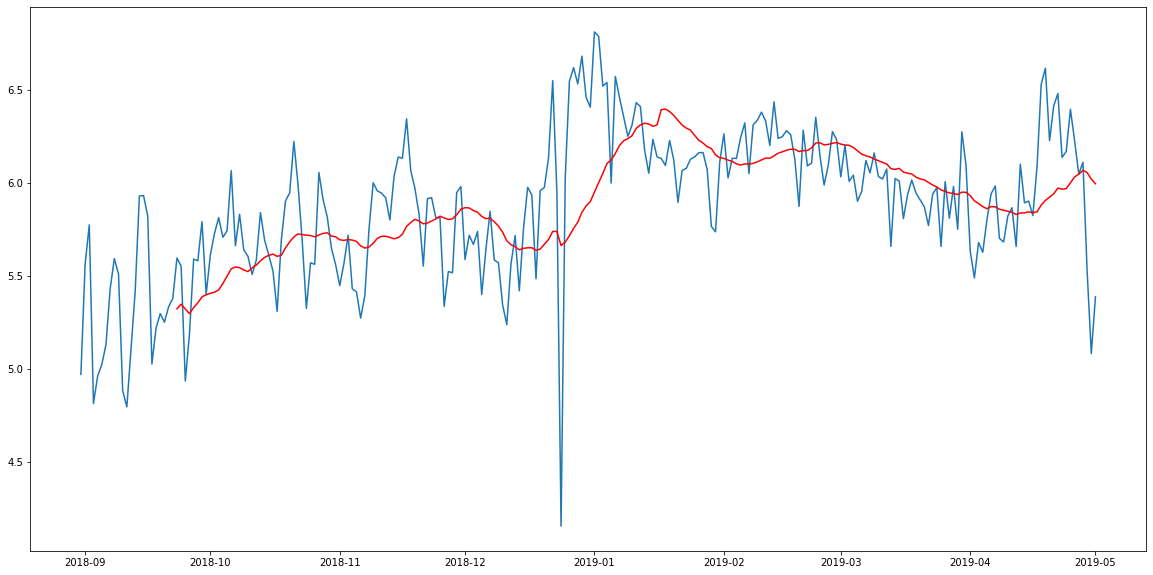

In [76]:
moving_avg = train_log.rolling(24).mean()
plt.plot(train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [77]:
train_log_moving_avg_diff = train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace = True)

In [78]:
adfuller_test(train_log_moving_avg_diff)

ADF Test Statistics : -3.6576547185582964
p-value : 0.004749777533469391
#Lags Used : 11
Number of observations used : 209
Strong Evidence Against The NULL Hypothesis(H0), reject the null hypothesis. Data has no unit root, it's stationary


In [79]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #determine rolling stats
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
   
    
    #plot rolling stats:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #performing dickey fuller test:
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'P-value', '#lags used', 'No of Observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

In [80]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

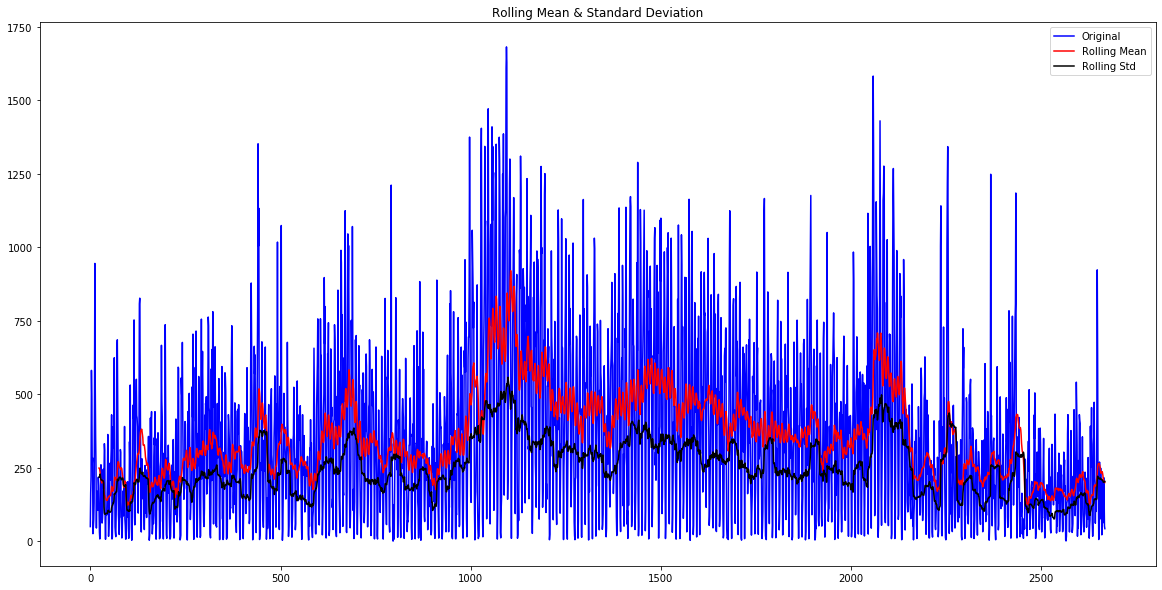

Results of Dickey-Fuller Test: 
Test Statistic               -4.119051
P-value                       0.000901
#lags used                   28.000000
No of Observations used    2639.000000
Critical Value (1%)          -3.432830
Critical Value (5%)          -2.862636
Critical Value (10%)         -2.567353
dtype: float64


In [81]:
test_stationary(train_org['Sales'])

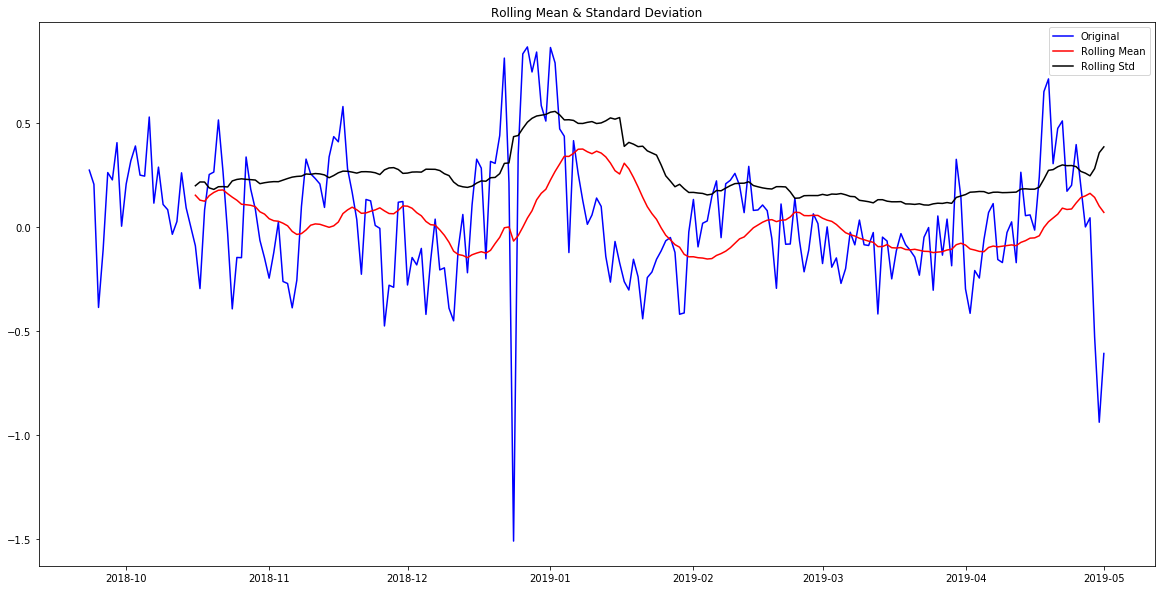

Results of Dickey-Fuller Test: 
Test Statistic              -3.657655
P-value                      0.004750
#lags used                  11.000000
No of Observations used    209.000000
Critical Value (1%)         -3.462032
Critical Value (5%)         -2.875471
Critical Value (10%)        -2.574195
dtype: float64


In [82]:
test_stationary(train_log_moving_avg_diff)

## Log Differencing 

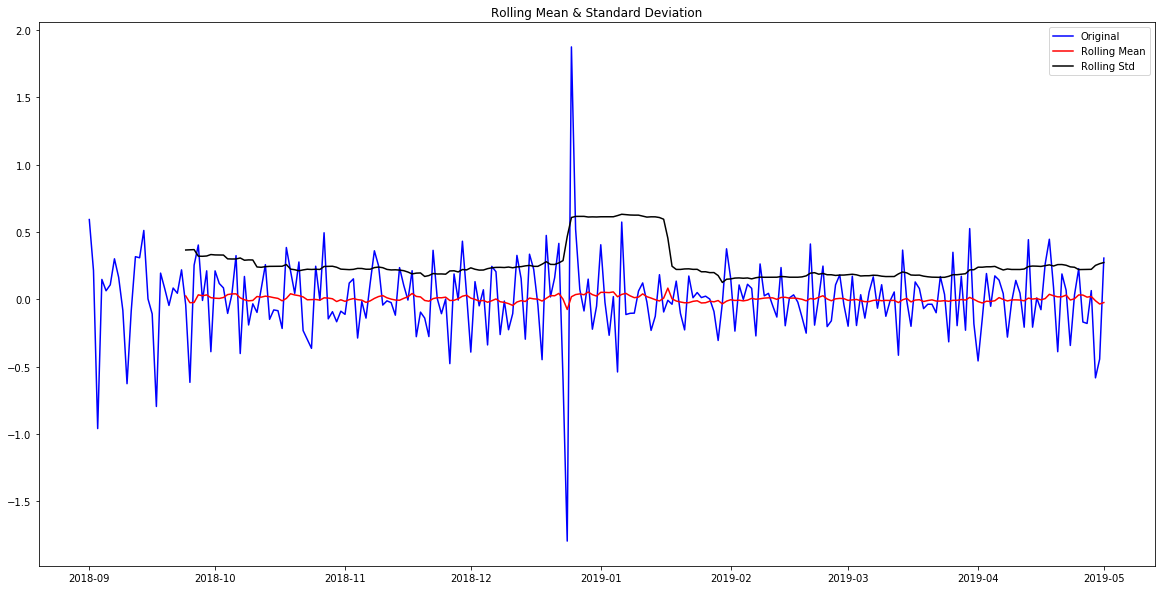

Results of Dickey-Fuller Test: 
Test Statistic              -5.459313
P-value                      0.000003
#lags used                  10.000000
No of Observations used    232.000000
Critical Value (1%)         -3.458855
Critical Value (5%)         -2.874080
Critical Value (10%)        -2.573453
dtype: float64


In [83]:
train_log_diff = train_log - train_log.shift(1)
test_stationary(train_log_diff.dropna())

## Seasonal Decompose

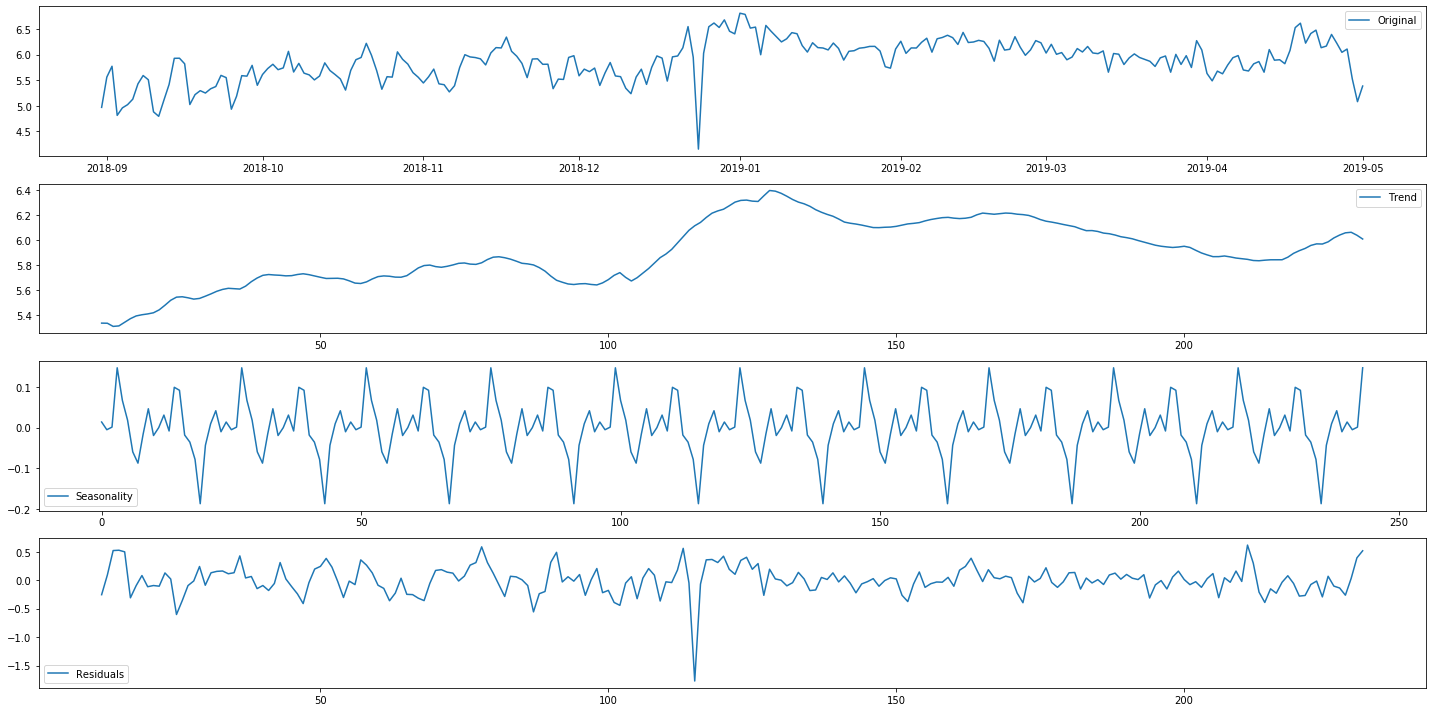

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(train_log).Sales.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

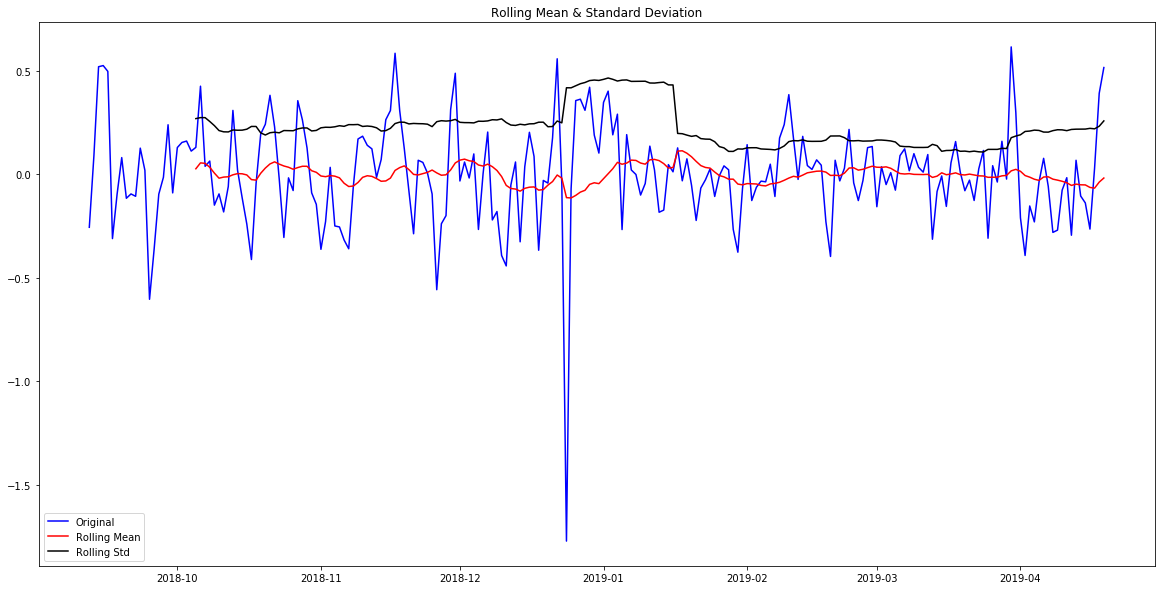

Results of Dickey-Fuller Test: 
Test Statistic            -5.733022e+00
P-value                    6.533777e-07
#lags used                 1.100000e+01
No of Observations used    2.080000e+02
Critical Value (1%)       -3.462186e+00
Critical Value (5%)       -2.875538e+00
Critical Value (10%)      -2.574231e+00
dtype: float64


In [85]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['Date'] = train_log.index
train_log_decompose.set_index('Date', inplace=True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [86]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

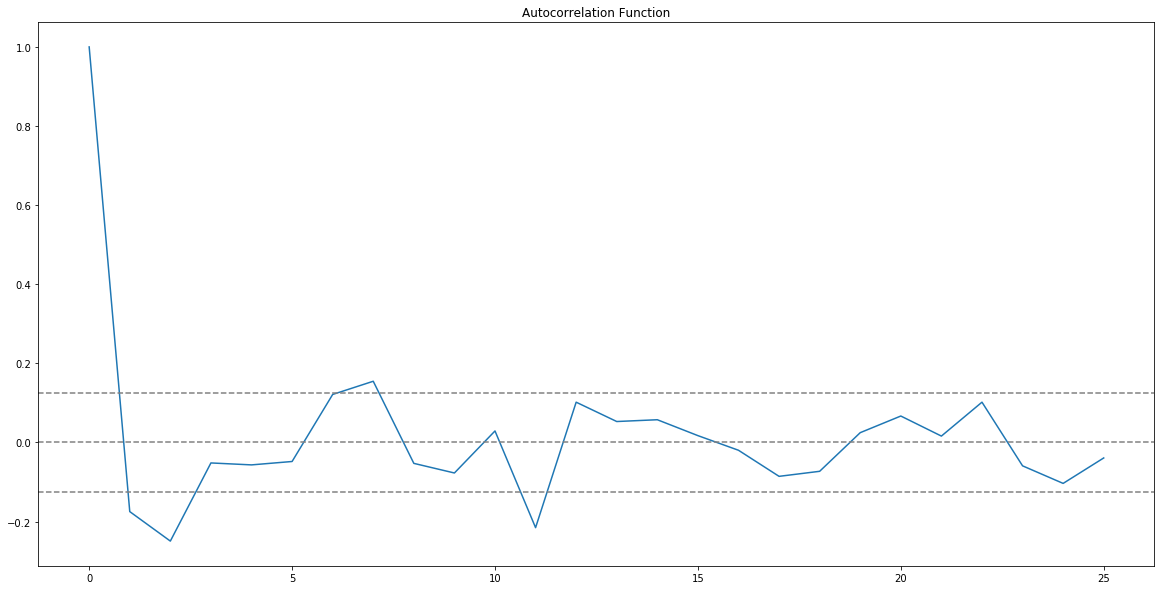

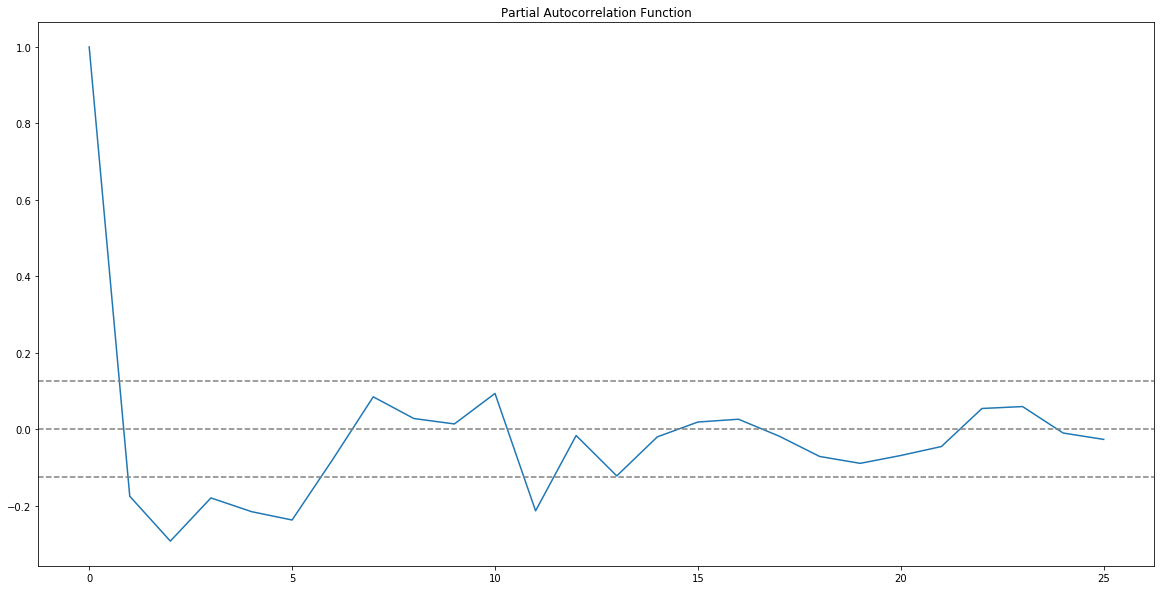

In [87]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

# # Regression Models (AR, MA, ARMA, ARIMA)

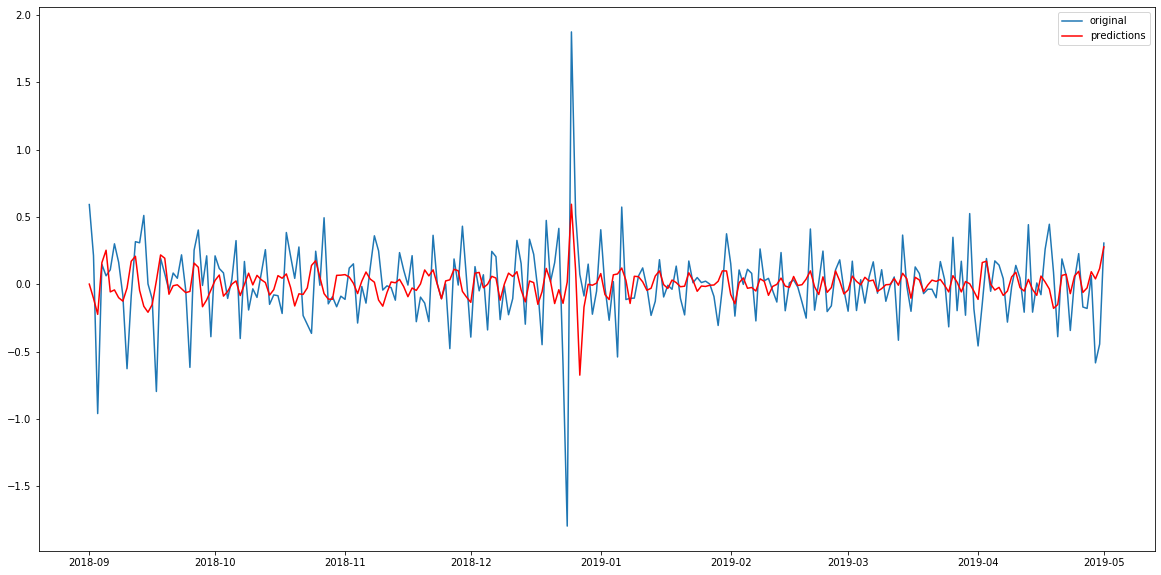

In [88]:
#AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order = (2,1,0)) #here the q value is zero since it is just the AR model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [89]:
AR_predict=results_AR.predict(start="2019-03", end="2019-05")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

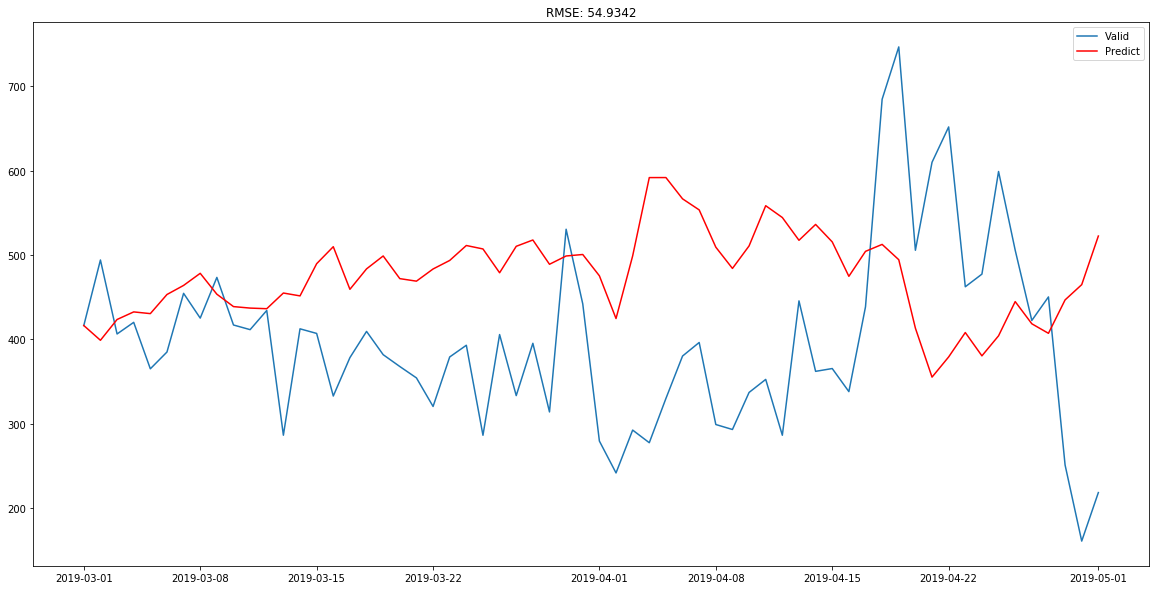

In [90]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

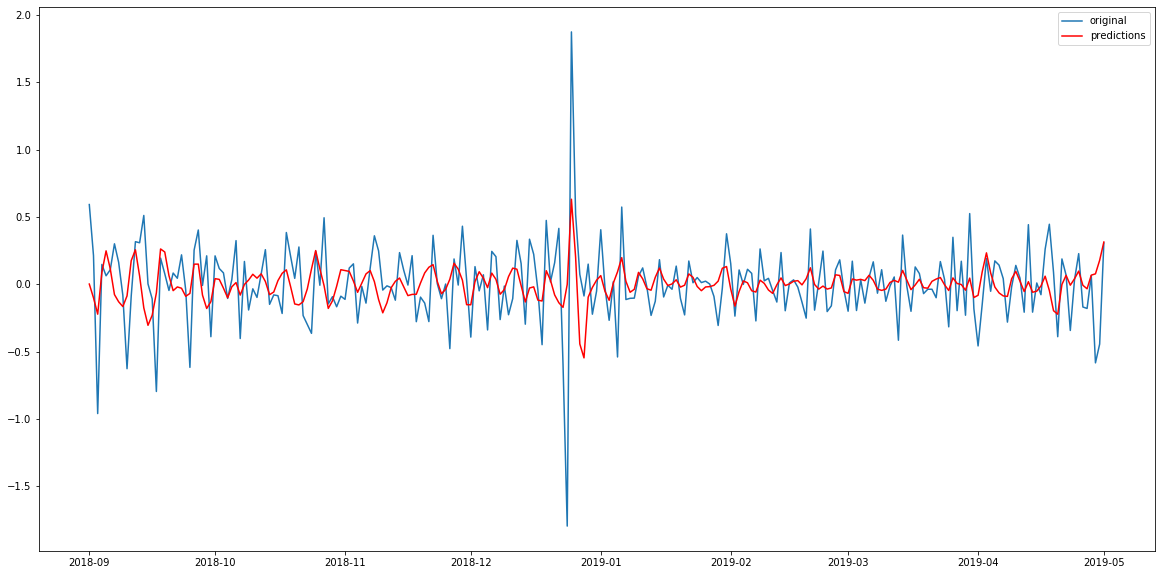

In [91]:
#AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order = (3,1,0)) #here the q value is zero since it is just the AR model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [92]:
AR_predict=results_AR.predict(start="2019-03", end="2019-05")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

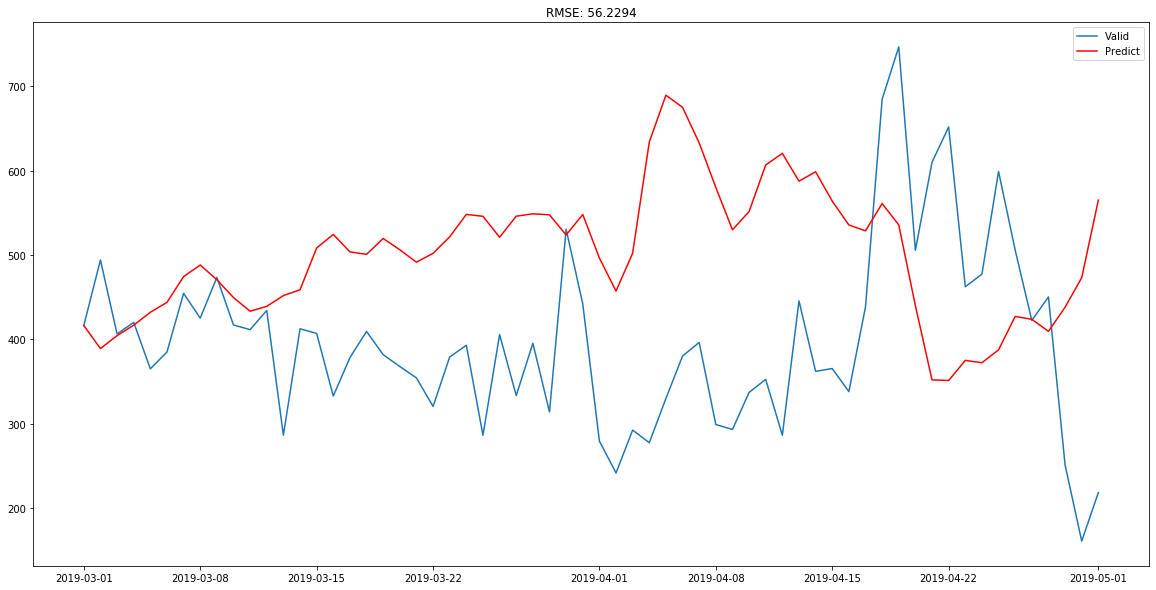

In [93]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

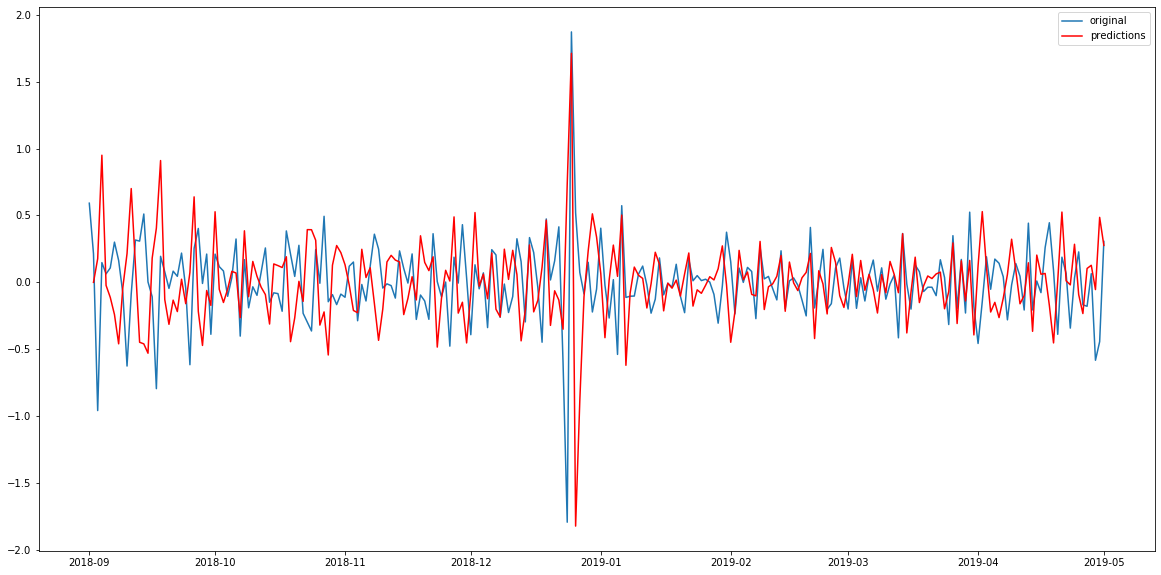

In [94]:
#AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order = (4,2,0)) #here the q value is zero since it is just the AR model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [95]:
AR_predict=results_AR.predict(start="2019-03", end="2019-05")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

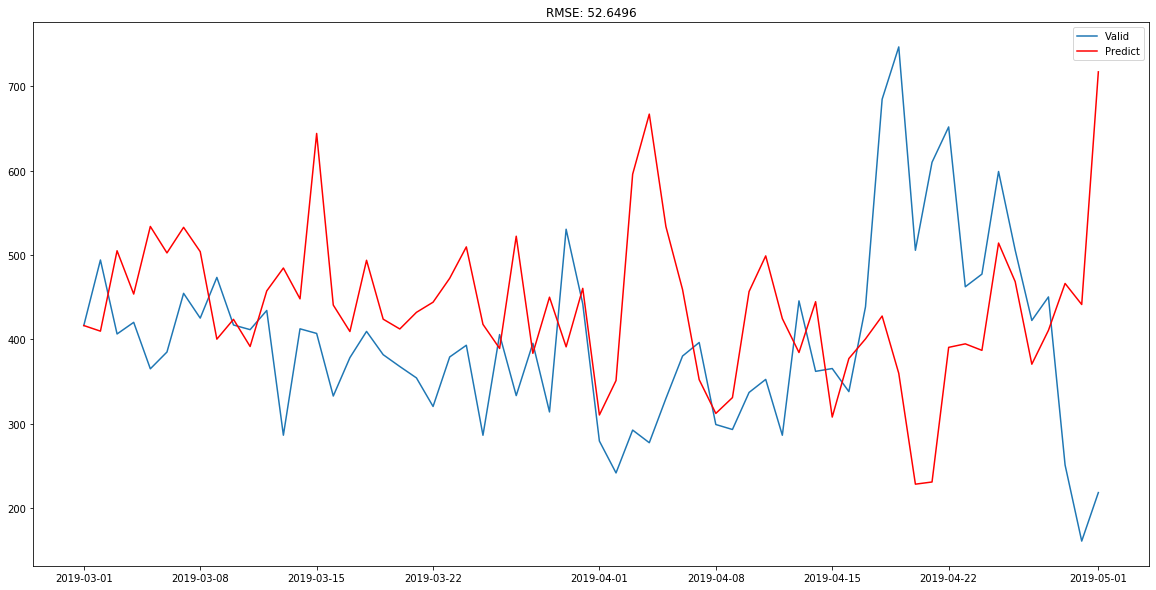

In [96]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

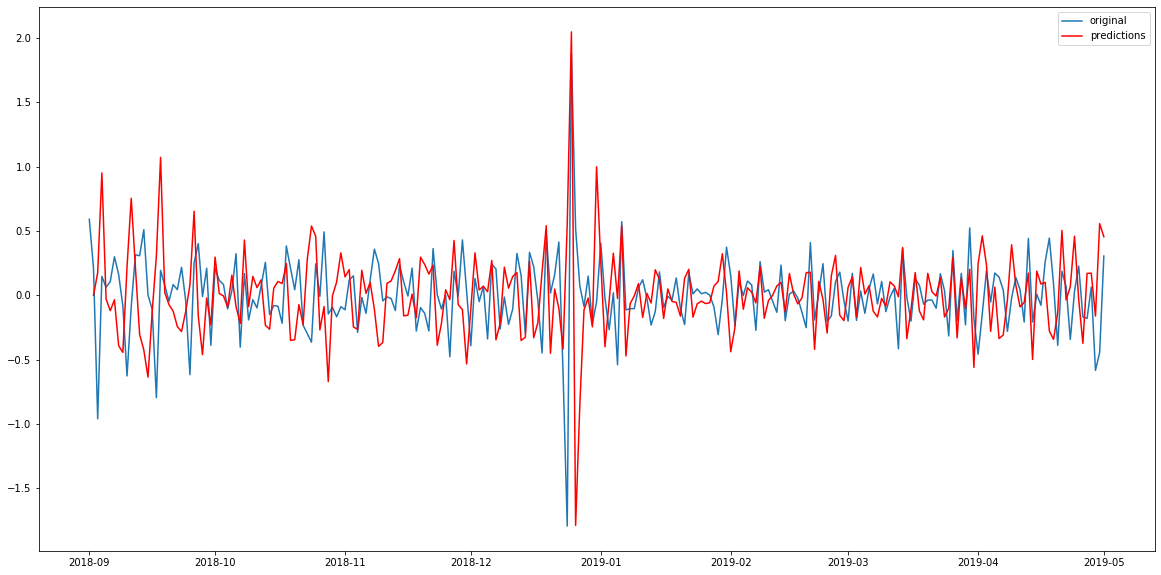

In [97]:
#AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order = (5,2,0)) #here the q value is zero since it is just the AR model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [98]:
AR_predict=results_AR.predict(start="2019-03", end="2019-05")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

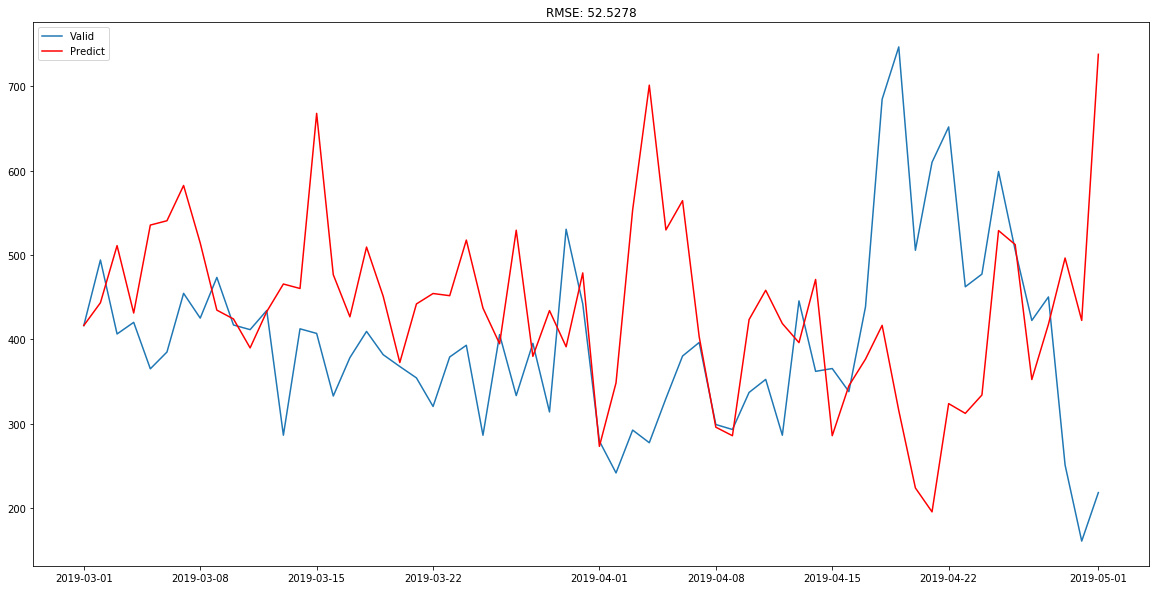

In [99]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

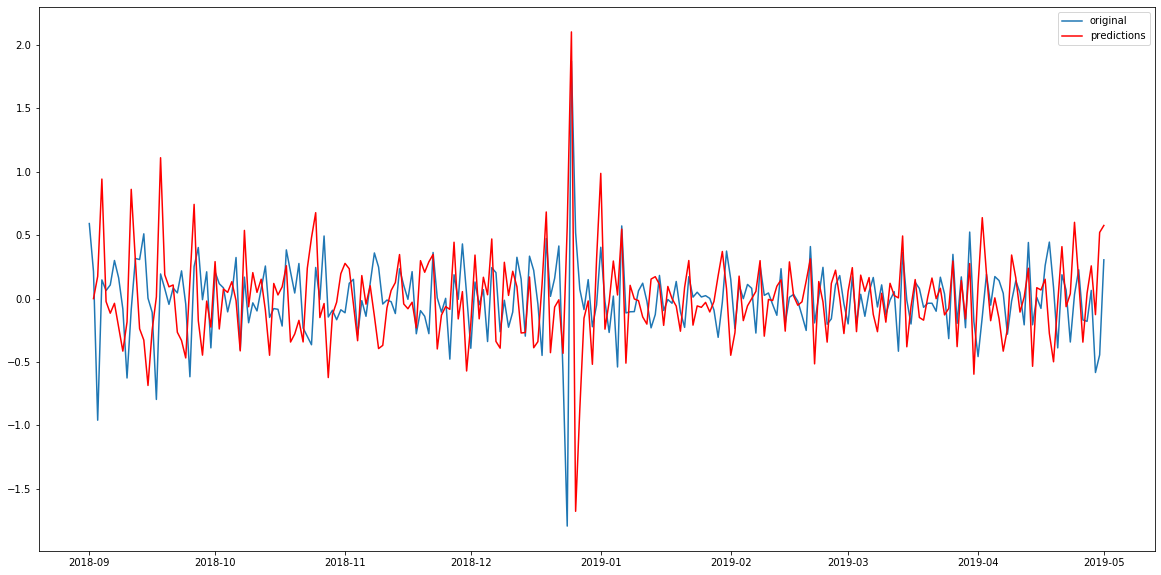

In [100]:
#AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order = (6,2,0)) #here the q value is zero since it is just the AR model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [101]:
AR_predict=results_AR.predict(start="2019-03", end="2019-05")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

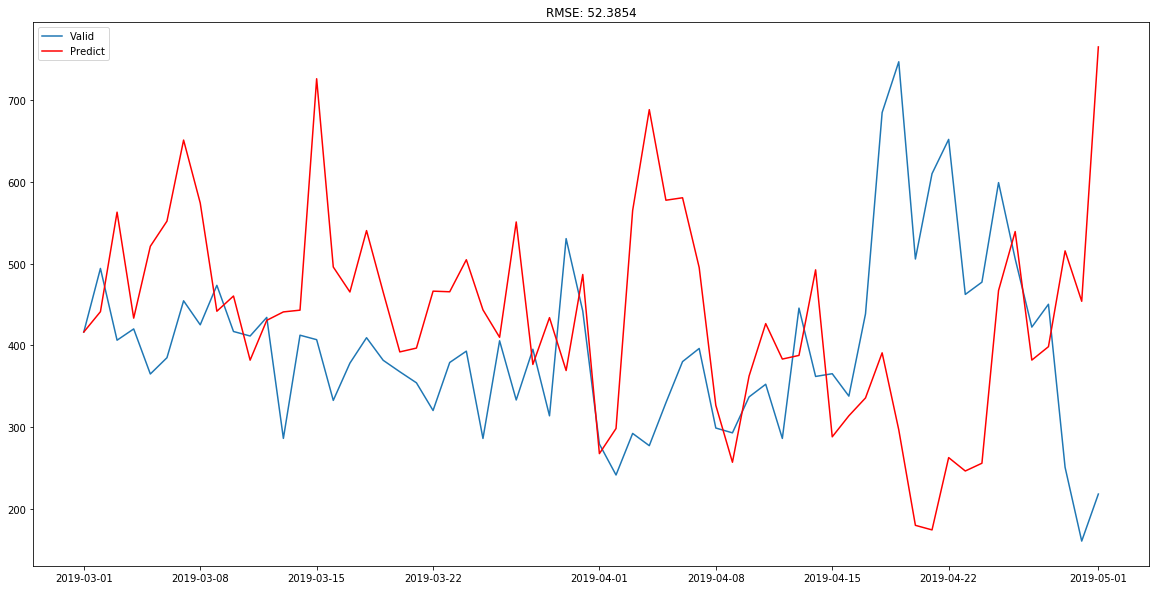

In [102]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

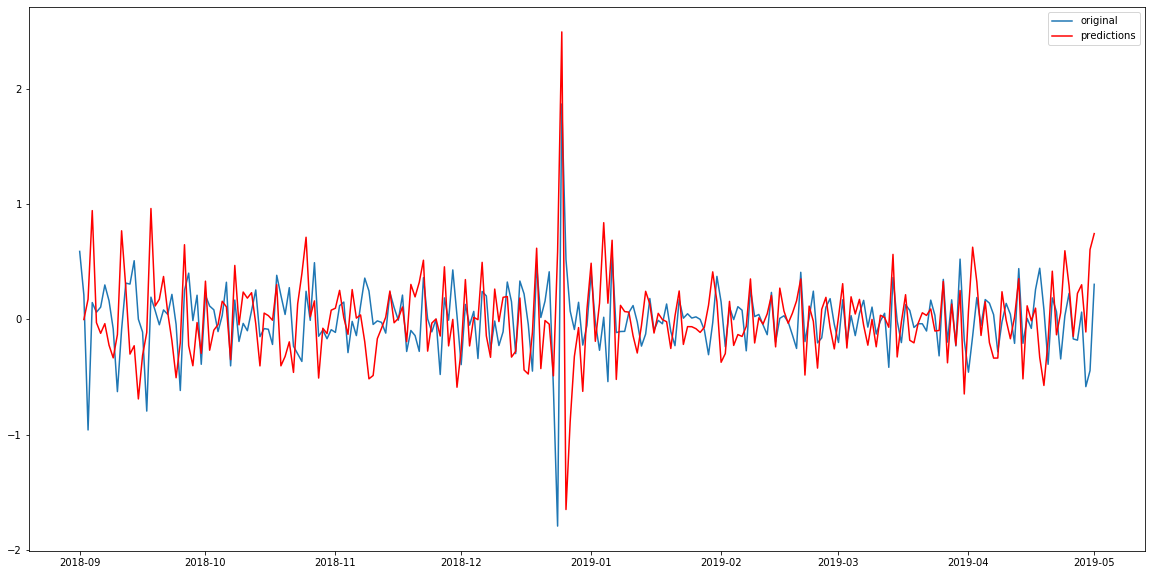

In [154]:
#AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order = (9,2,0)) #here the q value is zero since it is just the AR model
results_AR = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [155]:
AR_predict=results_AR.predict(start="2019-03", end="2019-05")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

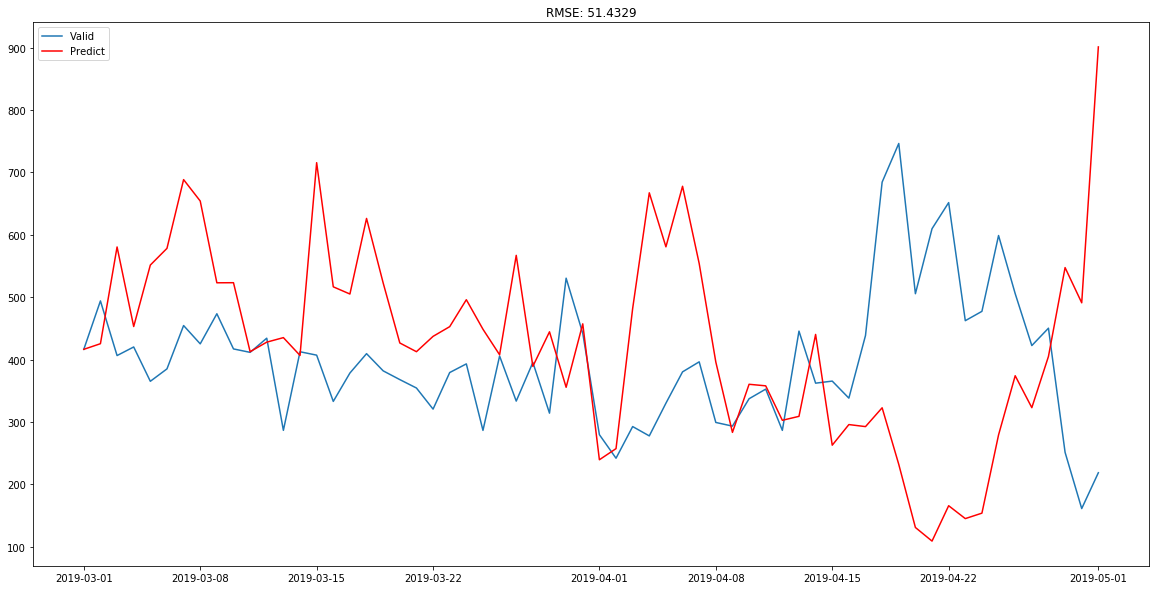

In [156]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

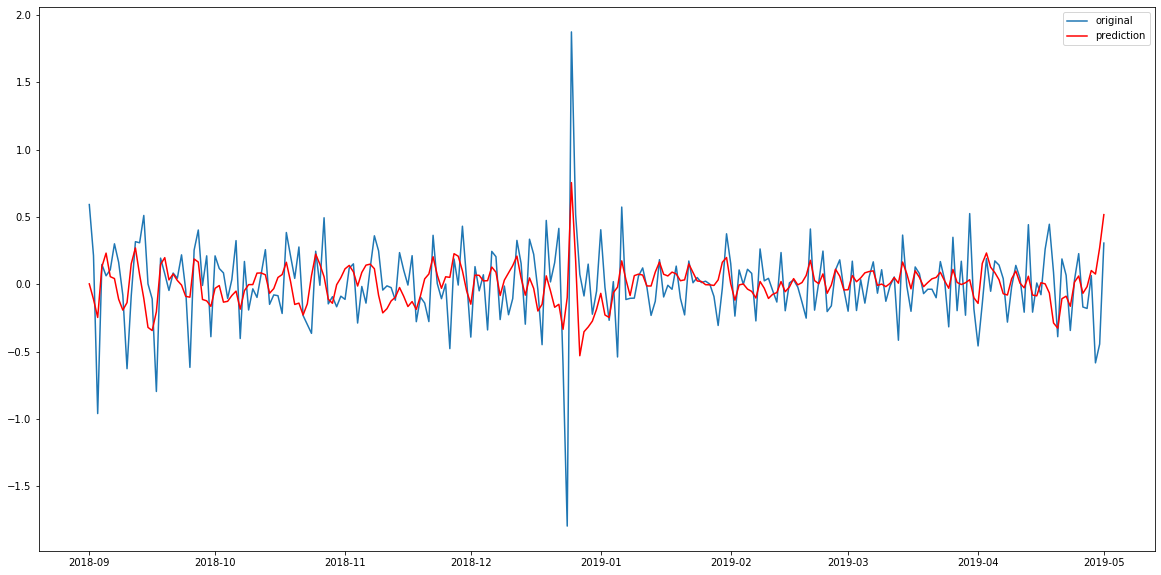

In [157]:
#MA Model
model = ARIMA(train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [107]:
MA_predict=results_MA.predict(start="2019-03", end="2019-05")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

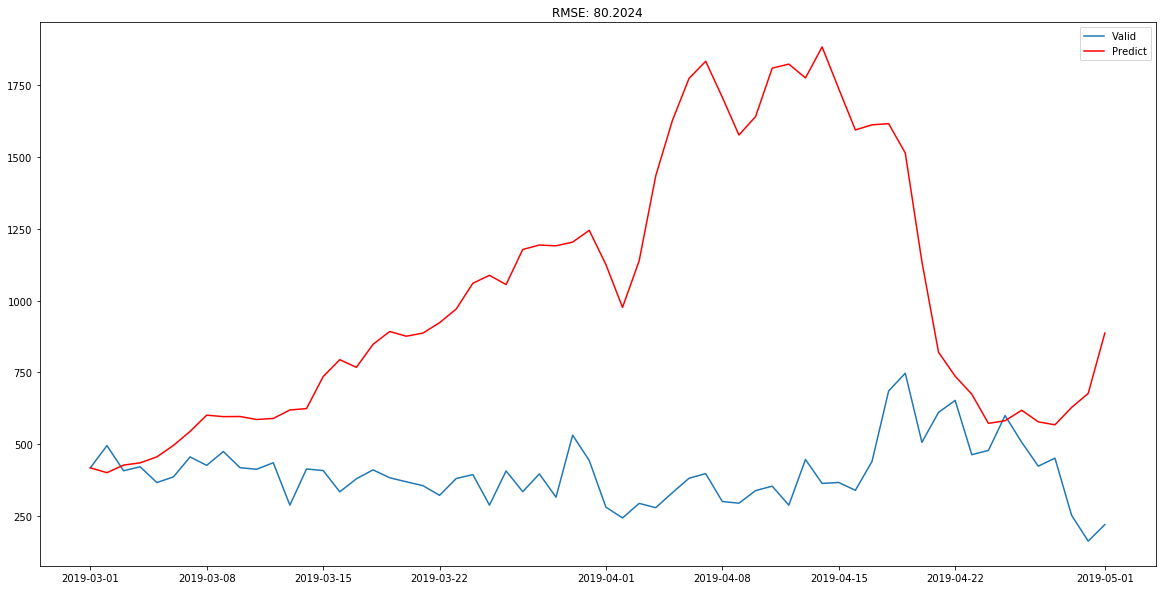

In [108]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

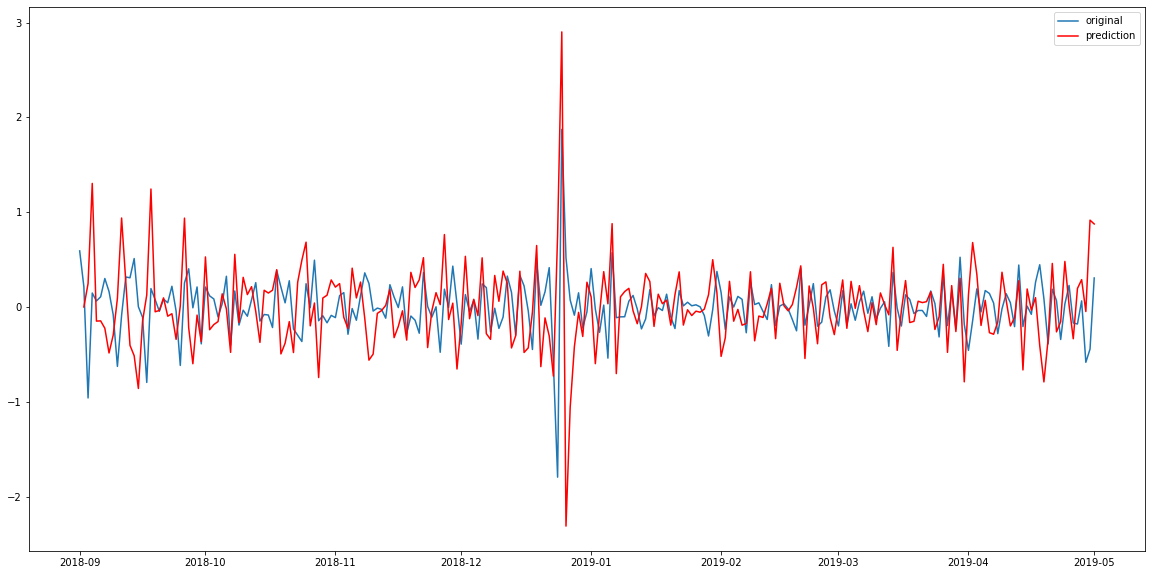

In [109]:
#MA Model
model = ARIMA(train_log, order=(0, 2, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [110]:
MA_predict=results_MA.predict(start="2019-03", end="2019-05")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

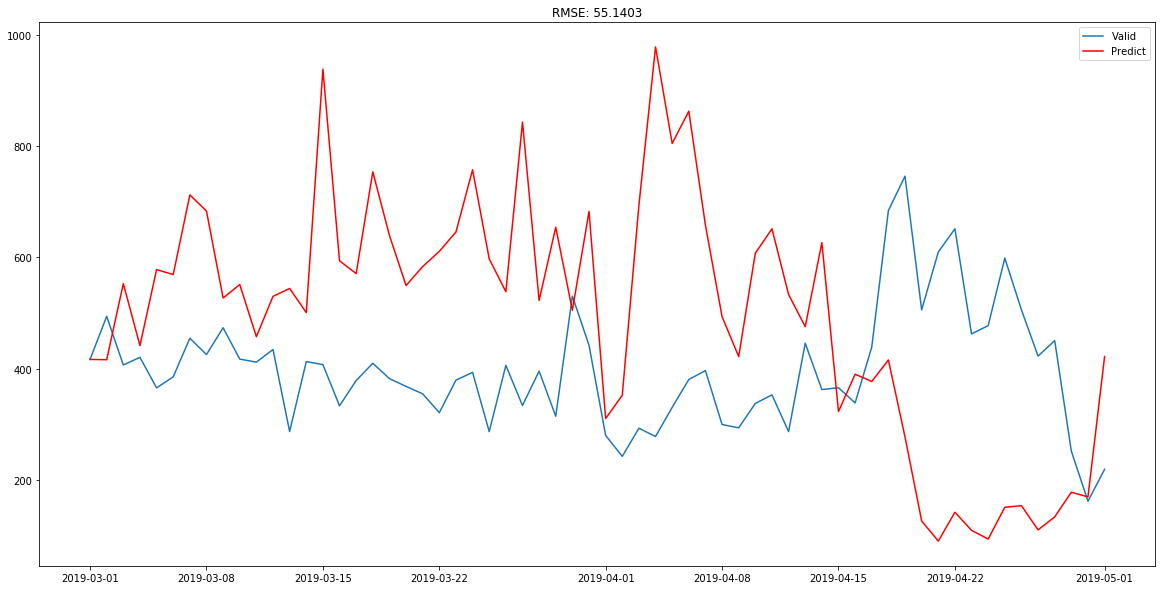

In [111]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

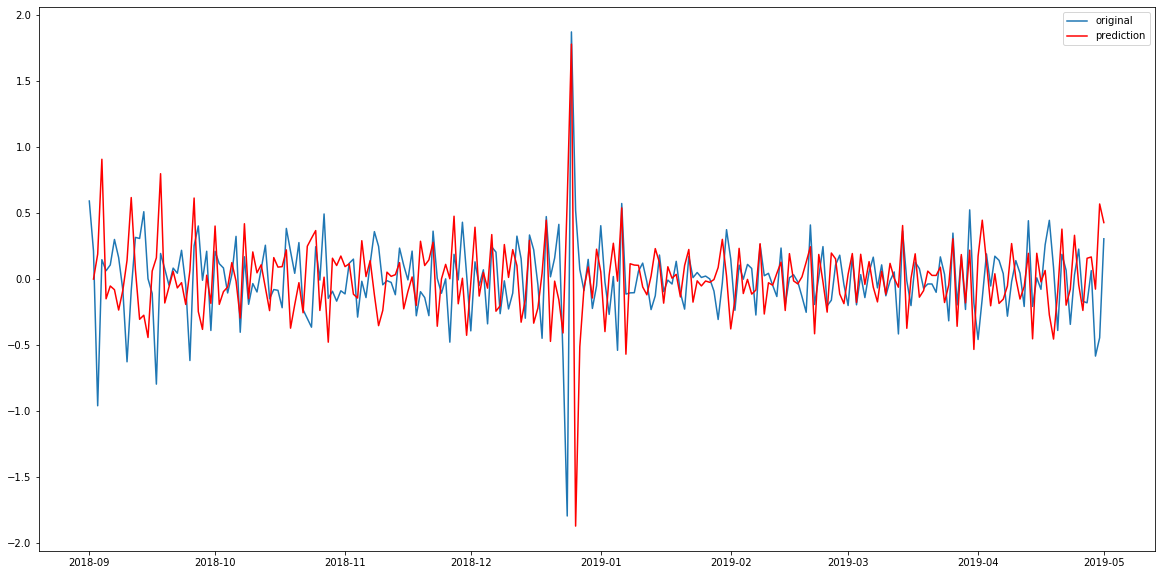

In [112]:
#MA Model
model = ARIMA(train_log, order=(0, 2, 1))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [113]:
MA_predict=results_MA.predict(start="2019-03", end="2019-05")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

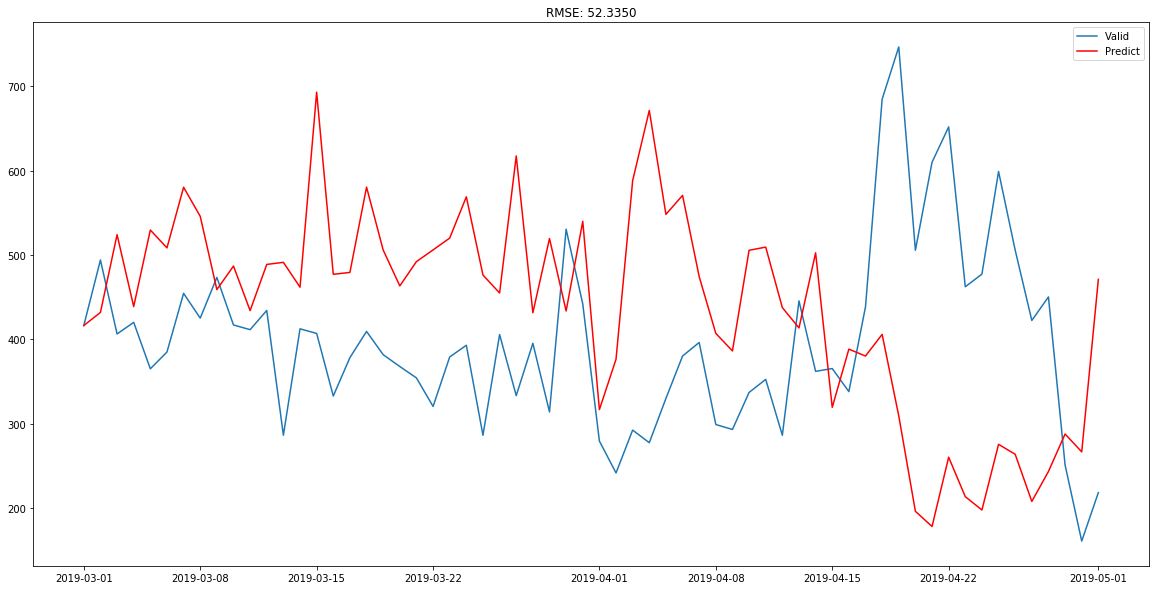

In [114]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

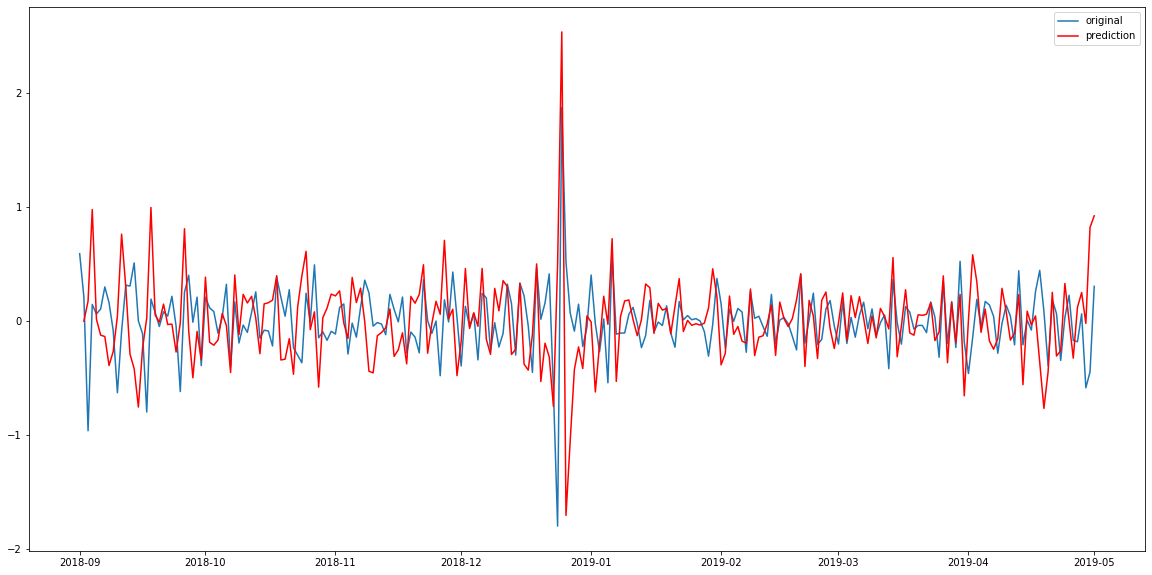

In [115]:
#MA Model
model = ARIMA(train_log, order=(0, 2, 3))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [116]:
MA_predict=results_MA.predict(start="2019-03", end="2019-05")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

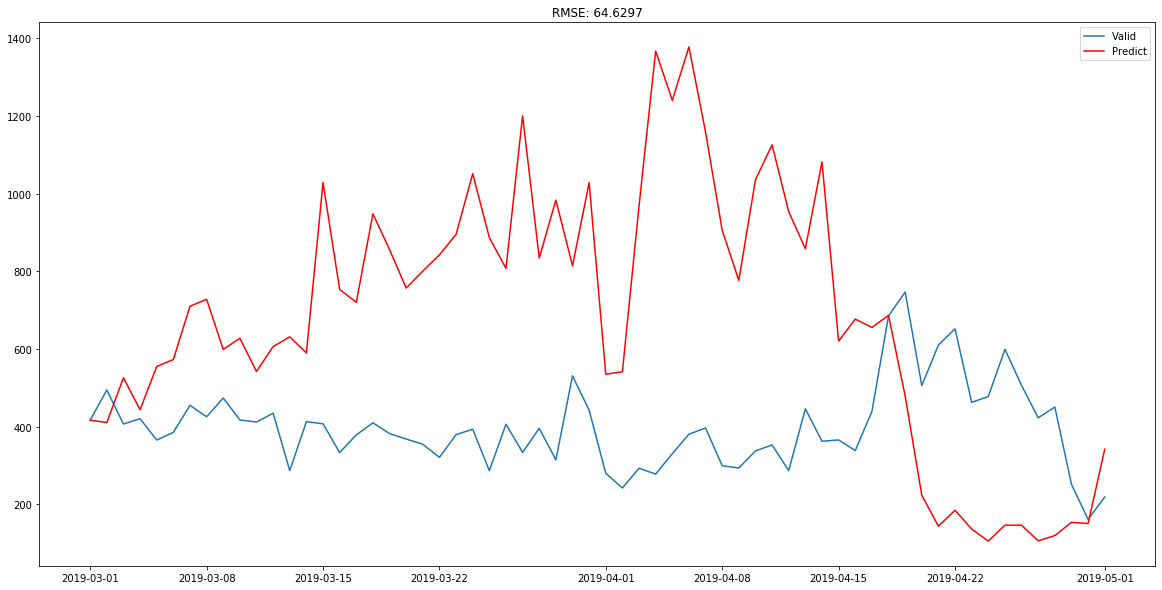

In [117]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


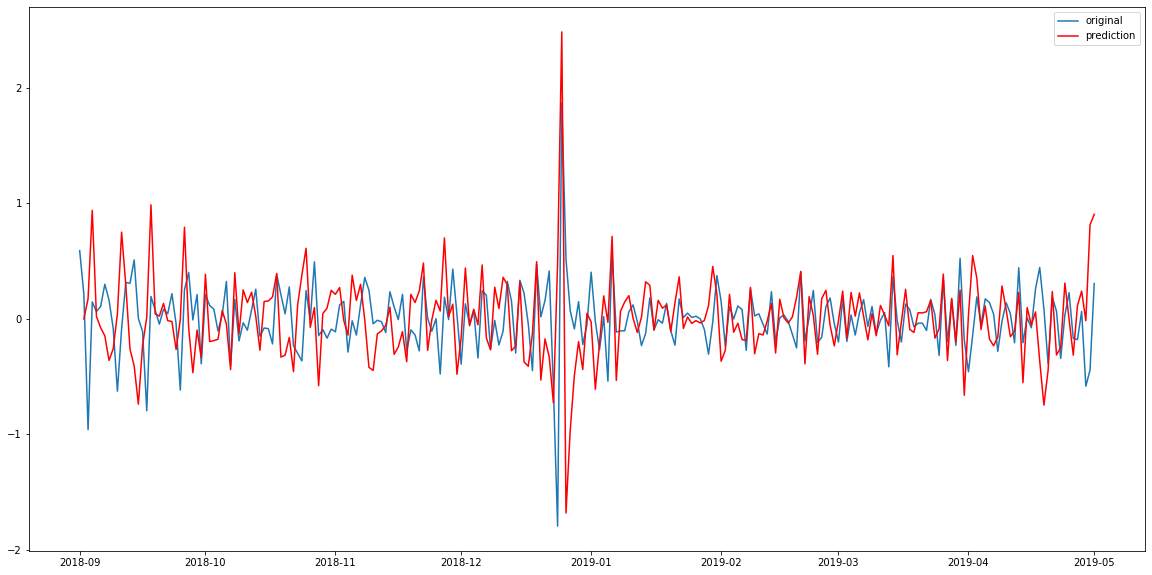

In [118]:
#MA Model
model = ARIMA(train_log, order=(0, 2, 5))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [119]:
MA_predict=results_MA.predict(start="2019-03", end="2019-05")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Sales'])[0], index = Valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

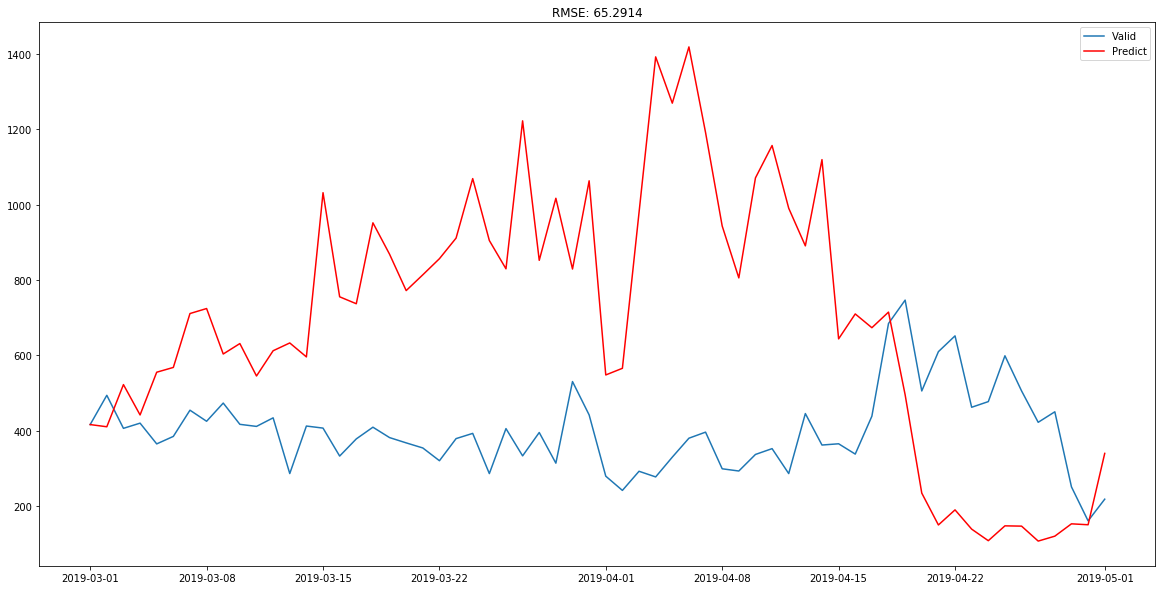

In [120]:
plt.plot(Valid['Sales'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Valid['Sales']))/Valid.shape[0]))
plt.show()

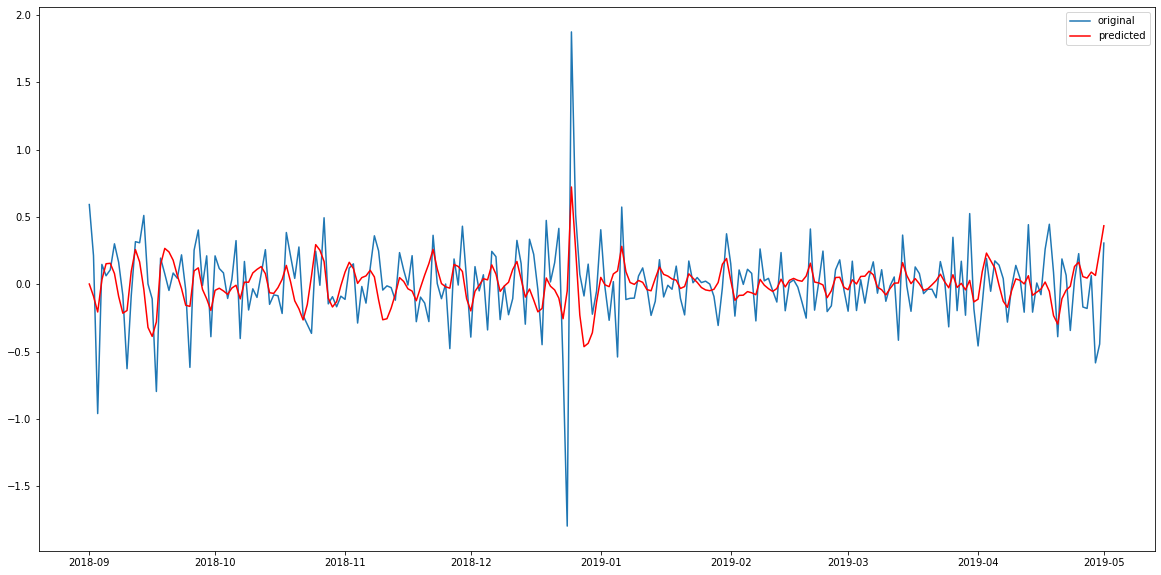

In [121]:
#ARMA Model
model = ARIMA(train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [122]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Sales'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Sales'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Sales']))/given_set.shape[0]))
    plt.show()

In [123]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Sales'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Sales']))/given_set.shape[0]))
    plt.show()

In [124]:
ARIMA_predict_diff=results_ARIMA.predict(start="2019-03", end="2019-05")

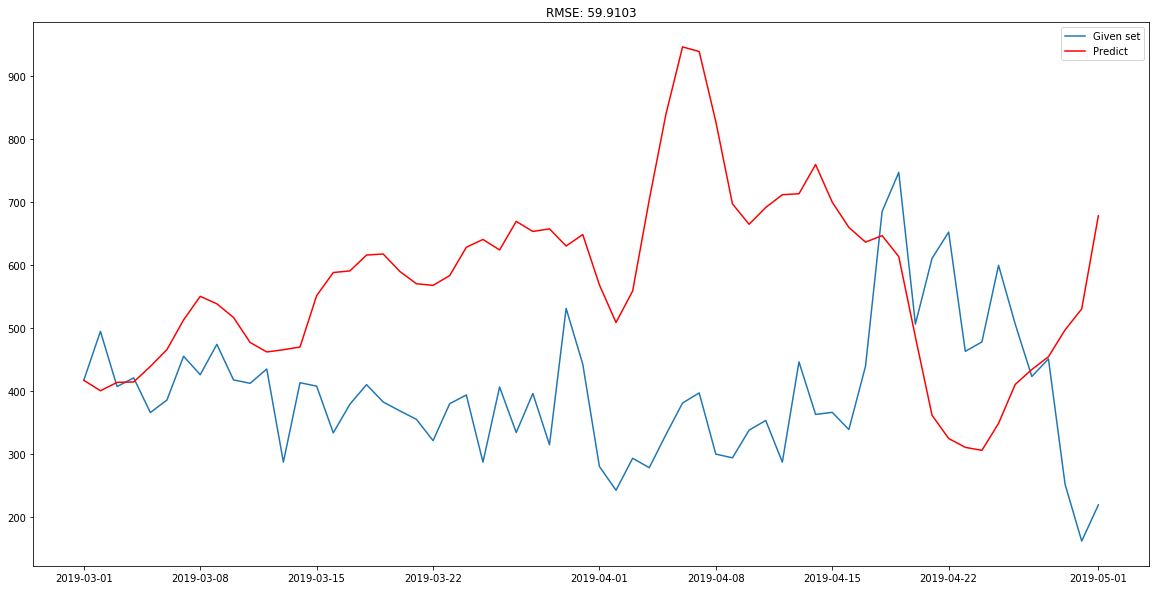

In [125]:
check_prediction_diff(ARIMA_predict_diff, Valid)

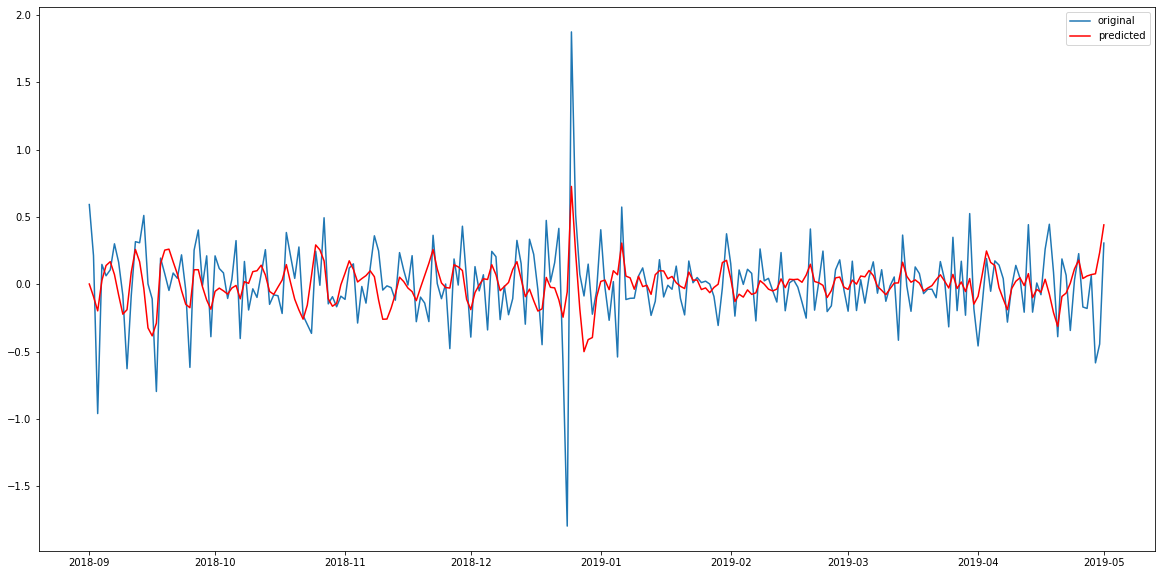

In [126]:
#ARMA Model
model = ARIMA(train_log, order=(3, 1, 3))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [127]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Sales'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Sales'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Sales']))/given_set.shape[0]))
    plt.show()

In [128]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Sales'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Sales']))/given_set.shape[0]))
    plt.show()

In [129]:
ARIMA_predict_diff=results_ARIMA.predict(start="2019-03", end="2019-05")

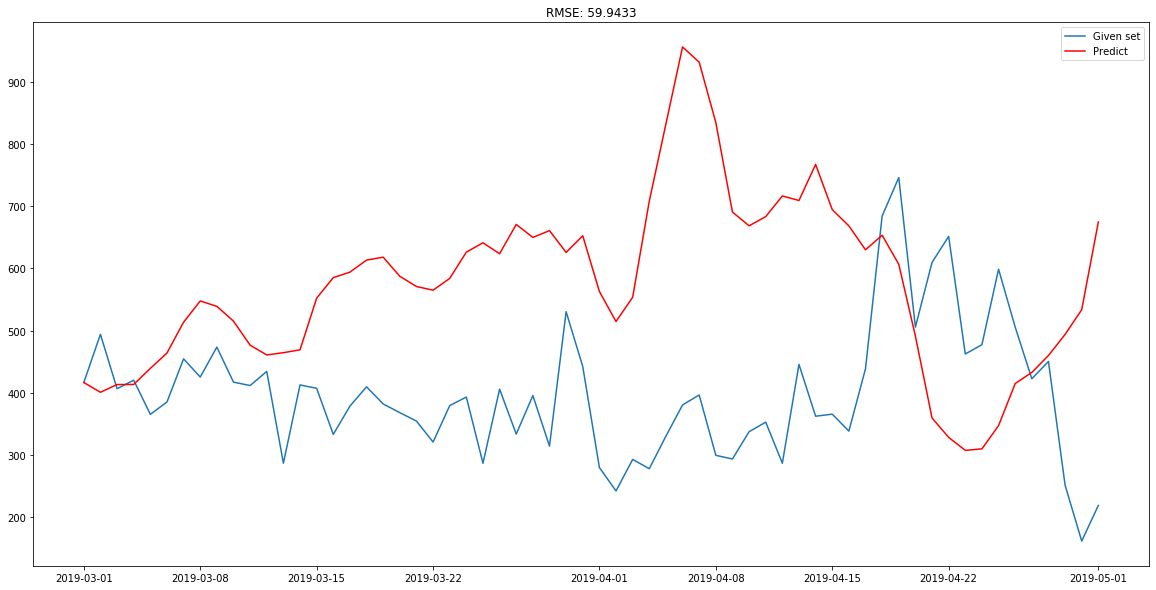

In [130]:
check_prediction_diff(ARIMA_predict_diff, Valid)

In [161]:
ARIMA_predict_diff.to_csv('ARIMA_Forecasts_Log.csv')

## SARIMA Modeling V1.1

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


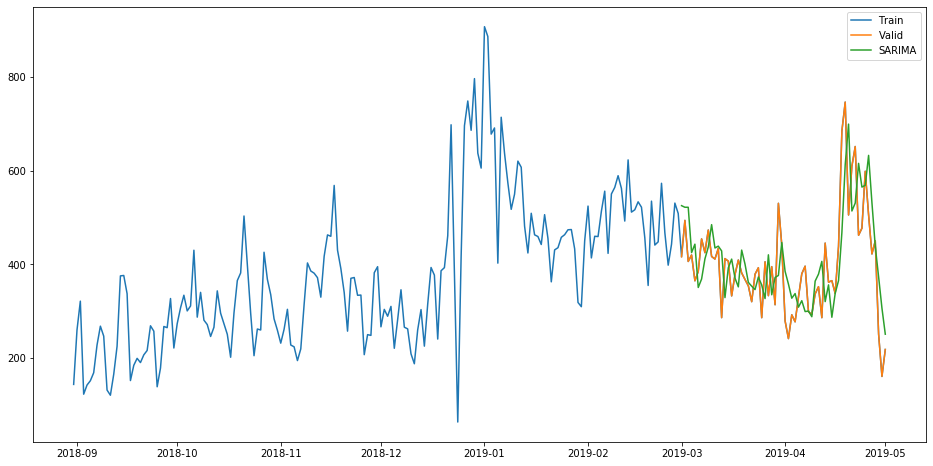

In [131]:
#SARIMAX Model
import statsmodels.api as sm
y_hat_avg = Valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Sales, order=(3, 1, 4),seasonal_order=(0,1,3,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2019-03", end="2019-05", dynamic=False)
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [132]:
rms = sqrt(mean_squared_error(Valid.Sales, y_hat_avg.SARIMA))
print(rms)

85.13015439560262


## SARIMA Modeling V1.2

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


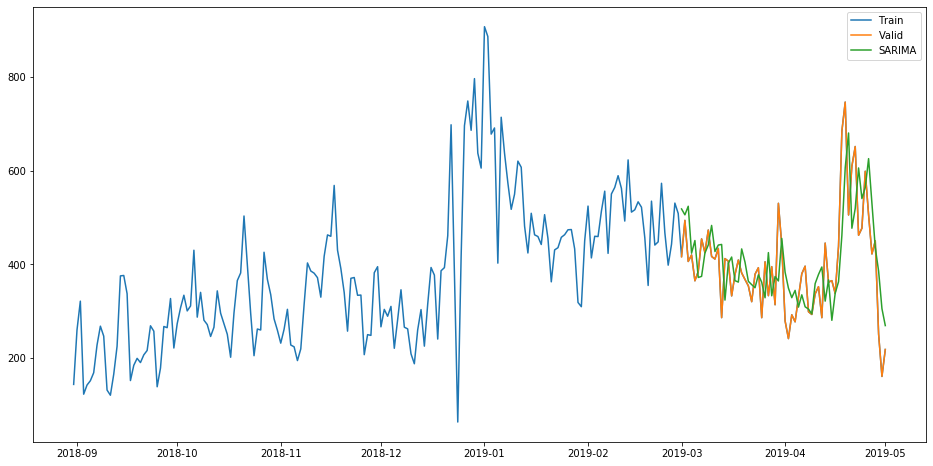

In [133]:
#SARIMAX Model
import statsmodels.api as sm
y_hat_avg = Valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Sales, order=(4, 1, 4),seasonal_order=(0,1,3,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2019-03", end="2019-05", dynamic=False)
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [134]:
rms = sqrt(mean_squared_error(Valid.Sales, y_hat_avg.SARIMA))
print(rms)

85.68741795515749


# Best Performing Model SARIMAX 
### Seasonal Autoregressive Model 

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


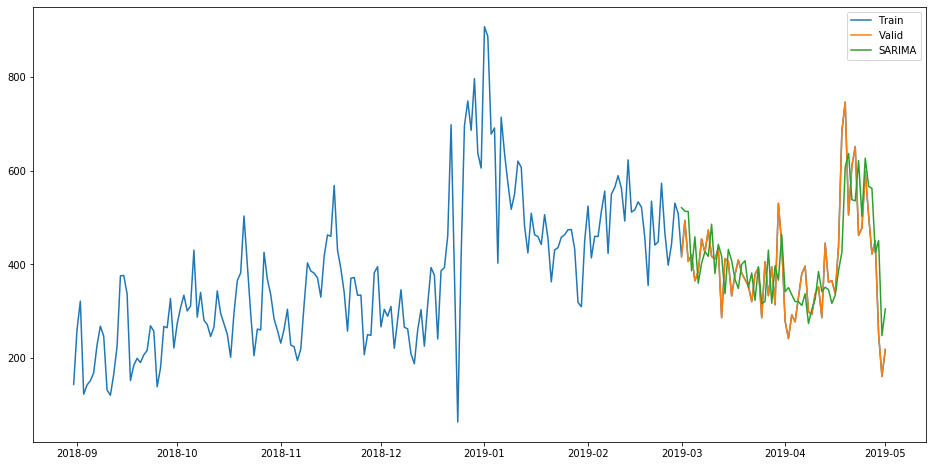

In [135]:
#SARIMAX Model
import statsmodels.api as sm
y_hat_avg = Valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Sales, order=(4, 1, 5),seasonal_order=(0,1,3,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2019-03", end="2019-05", dynamic=False)
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(Valid['Sales'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [136]:
rms = sqrt(mean_squared_error(Valid.Sales, y_hat_avg.SARIMA))
print(rms)

82.23552161268552


In [137]:
predict=fit1.predict(start="2019-03", end="2019-05", dynamic=True)

In [138]:
test['prediction']=predict

In [150]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_org, on=('Day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Date','Hour_x','Hour_y'], axis=1)

In [151]:
# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')


In [152]:
# Converting the ratio to the original scale
prediction['Sales']=prediction['prediction']*prediction['ratio']*24

In [153]:
# Converting the final submission to csv format
pd.DataFrame(submission, columns=['Sales']).to_csv('SARIMAX.csv')

## References: 
### Autoregressive Regression Approach 
https://github.com/nishanthgampa/Time-Series-Analysis-on-Transportation-Data/blob/master/TimeSeriesAnalysis.ipynb 
### SARIMA Model Documentation Source
https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html
### SARIMA Modeling
https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/